# **Loan Default Prediction**

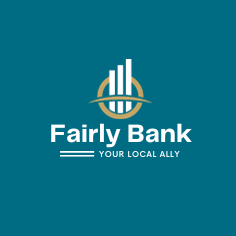

## **Problem Definition**




### **The Context:**

FairlyBank, a bank's consumer credit department aims to simplify the decision-making process for home equity lines of credit to be accepted.
To do this, they will adopt the Equal Credit Opportunity Act's guidelines to establish an empirically derived and statistically sound model for credit scoring. The model will be based on the data obtained via the existing loan underwriting process from recent applicants who have been given credit. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adversebehavior (rejections).

*Our bank, Fairly Bank, is a well implemented regional bank who wants to do a delicate balancing act between risk management and revenue generation while focussing on its corporate fairness and compliance values.*


 - Why is this problem important to solve?

A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.
The approval process for the loans is multifaceted. Through this process, the bank tries to check thecreditworthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases.
There have been attempts by many banks to automate this process by using heuristics. But with the advent of data science and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases and more efficient. At the same time, one important thing to keep in mind is to make sure that the machine does not learn the biases that
previously crept in because of the human approval process.

- What is the ECOA ?

The Equal Credit Opportunity Act was first pass in the US congress on October 1974 at a time when discrimination against women applying for credit was common. For example, mortgage lenders often discounted a married woman’s income, especially if she was of childbearing age or single women in general. In March 1976, US Congress amended the law to further prohibit lending discrimination based on race, color, religion, national origin, age, the receipt of public assistance income, or exercising one’s rights under certain consumer protection laws.

### **The objective:**

 - What is the intended goal?

Build a classification model to predict which applicants are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan in order to minimize financial risks associated with approving high-risk loans.

### **The key questions:**

**- Context** : Why is this problem important to solve?

**- The Objective?** : What is the specific goal of the loan default prediction project? Are we aiming to reduce financial losses, improve risk assessment, or enhance decision-making?

**- Data Collection and Sources** : What data sources will we use to train and validate the model? What is the background of this data? What does it contain? Are there any external data sources that could be valuable?

**- Data Preprocessing** : What are some patterns in the data? What does it mean for the problem formulation?
How will we clean and preprocess the data to handle missing values, outliers, and data quality issues?

**- Feature Selection and Engineering** : What features will we include in the model, and why? Are there any domain-specific variables that might be relevant?

**- Target Variable Definition** : How will we define a "loan default" for the purpose of modeling? Is it based on a specific threshold of missed payments or other criteria?

**- Data Imbalance** : How will we deal with class imbalance if it exists (i.e., if there are more non-defaults than defaults)?

**- Model Selection** : What algorithm models will we use for prediction (e.g., logistic regression, random forests, gradient boosting, neural networks)? Why are these models suitable for the task?

**- Training and Validation** : How will we split the data into training, validation, and test sets? What performance metrics (e.g., accuracy, precision, recall, F1-score…) will we use to assess model evaluation?

**- Model Interpretability** : Can the model's predictions be easily explained to stakeholders? Are there techniques like feature importance analysis or SHAP values that can provide insights into the model's decision-making?

**- Hyperparameter Tuning** : How will we optimize the model's hyperparameters to achieve the best performance? Will we use techniques like grid search or random search?

**- Ethical and Regulatory Considerations** : Are there any legal or ethical constraints related to using certain features or making certain predictions? How will we ensure fairness and avoid bias in the model's predictions?

**- Stakeholder Communication** : How will we communicate the model's predictions and findings to stakeholders, including loan officers, managers, and regulators?

**- Rejection Inference**
If a loan application is rejected based on the model's prediction, how will we provide an explanation to the applicant, if required?



### **The problem formulation**:

- What is it that we are trying to solve using data science?

As bad loans (NPA) usually eat up a major chunk of their profits, we want the bank to reduce the possible error when accepting credits to limit defaulters without minimizing revenue increase. We will try to solve this by :
-  giving recommendations to the bank on the important features to consider from loan applicants
- building an interpretable modeling techniques to predict clients who are likely to default on their loan
while adopting the Equal Credit Opportunity Act's guidelines and regulations.


## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [6]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To encode categorical values
from sklearn.preprocessing import OneHotEncoder

# To scale the data
from sklearn.preprocessing import StandardScaler

# To help with model building
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score, f1_score, precision_recall_curve

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.2f" % x)
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the Dataset**

In [7]:
# Connecting to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Loading the dataset from Google Colab
path='/content/drive/MyDrive/AAA-MIT/CAPSTONE PROJECT/Capstone_LOAN_PRED_KARINE/hmeq.csv'
df=pd.read_csv(path)

## **Data Overview**

The primary goal of a data overview is to get a high-level understanding of the dataset's structure, size, and general characteristics.

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [9]:
# Checking the shape of the dataset
df.shape

(5960, 13)

The dataset has 5,960 rows and 13 columns.

In [10]:
# Displaying the first and last rows of the dataset
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.00,39025.00,HomeImp,Other,10.50,0.00,0.00,94.37,1.00,9.00,NaN
1,1,1300,70053.00,68400.00,HomeImp,Other,7.00,0.00,2.00,121.83,0.00,14.00,NaN
2,1,1500,13500.00,16700.00,HomeImp,Other,4.00,0.00,0.00,149.47,1.00,10.00,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.00,112000.00,HomeImp,Office,3.00,0.00,0.00,93.33,0.00,14.00,NaN


In [11]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.00,90185.00,DebtCon,Other,16.00,0.00,0.00,221.81,0.00,16.00,36.11
5956,0,89000,54576.00,92937.00,DebtCon,Other,16.00,0.00,0.00,208.69,0.00,15.00,35.86
5957,0,89200,54045.00,92924.00,DebtCon,Other,15.00,0.00,0.00,212.28,0.00,15.00,35.56
5958,0,89800,50370.00,91861.00,DebtCon,Other,14.00,0.00,0.00,213.89,0.00,16.00,34.34
5959,0,89900,48811.00,88934.00,DebtCon,Other,15.00,0.00,0.00,219.60,0.00,16.00,34.57


In [12]:
# Checking for duplicated values
df.duplicated().sum()

0

- We do not have any duplicated values in the dataset.

In [13]:
# Checking for missing values
round(df.isnull().sum() / df.isnull().count() * 100,2)

BAD        0.00
LOAN       0.00
MORTDUE    8.69
VALUE      1.88
REASON     4.23
JOB        4.68
YOJ        8.64
DEROG     11.88
DELINQ     9.73
CLAGE      5.17
NINQ       8.56
CLNO       3.72
DEBTINC   21.26
dtype: float64

- We have several variables with null values : MORTDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC.
- We will look closer on how to deal with those null values.

In [14]:
# Checking the data types and columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


- From the 13 variables in the dataset, 2 are objects, 2 are integer, 9 is float.
- As seen previously, we have null values for several variables that will look at.

In [15]:
# Checking if unique values in the dataset
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

We do not have unique values in the dataset, so we won´t drop any column.

**OBSERVATIONS OF DATA OVERVIEW**
- The dataset has 5,960 rows and 13 columns.
- We have several variables with null values : MORTDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC. We will look closer on how to deal with those null values.
- We do not have any duplicated values in the dataset.
- From the 13 variables in the dataset, 2 are objects, 2 are integer, 9 is float.
- We do not have unique values in the dataset, so we won´t drop any column.

## Summary Statistics

Summary statistics provide a more detailed and quantitative description of the dataset. They help in understanding the central tendency, spread, and distribution of the data.

In [16]:
# Let´s look at the distribution of the BAD target variable
df.BAD.value_counts(normalize = True)

0   0.80
1   0.20
Name: BAD, dtype: float64

- From the BAD variable, 20% of clients defaulted on loan and 80% of clients paid the loan. This is an unbalanced dataset that we will resolve when building prediction models.

In [17]:
# Checking the descriptive statistics of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
LOAN,5960.00,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.00,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.00,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.00,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.00,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.00,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.00,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.00,1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,5738.00,21.30,10.14,0.00,15.00,20.00,26.00,71.00


**OBSERVATIONS**

- The BAD variable is explained above.
- The LOAN variable (the amount on loan approved) is different for client (5,960 different amounts). The average is 18,608. While 1,100 is the minimum and 89,900 is the maximum.
- The MORTDUE variable (amount due on the existing morgage) is on average of 73,761,  with a minimum of 2,063 and a maximum of 399,550.
- The VALUE (current value of the property) is on average 101,776 ; with amount from minimum 8,000 to maximum 855,909 ; which gives us a very large range of property value. We will look into outliers if any and the distribution as it seems to be left squewed with 50% of values at 89,235.
- The YOJ (years at present job) is on average of 8.9 ; with minimum 0 and maximuM of 41 years. We will also look at outliers and the distribution as it seems to be right squewed with 50% of values at 7 years.
- The DEROG (number of major derogatory reports) is contained between 0 and 10. We will look deeper into this variable to see its outliers and distribution.
- The DELINQ (number of delinquent credit lines) is on average of 0.45 with minimum of 0 to 15 credit lines. The distribution seems to be left squewed as 50% of data has 0 credit lines.
- The CLAGE (age of the oldest credit line) is on average of 179 months with a minimum of 0 and a maximum of 1168 months. This distribution is left squewed.
- The NINQ (number of recent credit inquiries) is on average of 1.19 ; with minimum of 0 to 17 inquiries. The distribution seems to be left squewed as 50% of data has 1 inquiries.
- The CLNO (number of existing credit lines) is 21.3 on average with a minimum of 0 and a maximum of 71 credit lines. We will look into the distribution as 50% of them have 20 existing credit lines.
- The DEBTINC (debt-to-income ratio) is on average of 33.78 ; where the minimum is 0.52 and the maximum is 203. The distribution seems to be left squewed as 50% of data has 34.82 on ratio.

In [18]:
# List of all the important numerical variables
num_col = ['LOAN','MORTDUE','VALUE', 'YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

In [19]:
# List of all the important categorical variables
cat_col = ['REASON', 'JOB' ]

In [20]:
# Printing the number of occurences of each unique value in each categorical column
for column in cat_col :
  print(df[column].value_counts(1))
  print('-' * 30)

DebtCon   0.69
HomeImp   0.31
Name: REASON, dtype: float64
------------------------------
Other     0.42
ProfExe   0.22
Office    0.17
Mgr       0.14
Self      0.03
Sales     0.02
Name: JOB, dtype: float64
------------------------------


- The REASON of the lean request is 69% for Debt Consolidation and 31% for Home Improvement. Which means that 69% of loan applicants are taking out a new loan to pay off other liabilities and consumer debts.
- The type of JOB that loan applicant has  is mainly Other with 42%, the ProfExe with 22%,  Office with 17%, Mgr with 14% and lastly Self with 3% and Sales with 2%.
- It would be recommended to add more significant job categories to look deeper into the Other Job segment.

**OBSERVATIONS OF SUMMARY STATISTICS**




- From the BAD variable, 20% of clients defaulted on loan and 80% of clients paid the loan. This is an unbalanced dataset that we will resolve when building prediction models.
20% of applicants have defaulted to pay the loan.
- The LOAN variable (the amount on loan approved) is different for client (5,960 different amounts). The average is 18,608 with 1,100 as the minimum and 89,900 as the maximum. 50% of loans are at 16,300.
- The MORTDUE variable (amount due on the existing morgage) is on average of 73,761, with a minimum of 2,063 and a maximum of 399,550.
- The VALUE (current value of the property) is on average 101,776 ; with amount from minimum 8,000 to maximum 855,909 ; which gives us a very large range of property value. We will look into outliers if any and the distribution as it seems to be left squewed with 50% of values at 89,235.
- The YOJ (years at present job) is on average of 8.9 ; with minimum 0 and maximum of 41 years. We will also look at outliers and the distribution as it seems to be right squewed with 50% of values at 7 years.
- The DEROG (number of major derogatory reports) is contained between 0 and 10. We will look deeper into this variable to see its outliers and distribution.
- The DELINQ (number of delinquent credit lines) is on average of 0.45 with minimum of 0 to 15 credit lines. The distribution seems to be left squewed as 50% of data has 0 credit lines.
- The CLAGE (age of the oldest credit line) is on average of 179 months with a minimum of 0 and a maximum of 1168 months. This distribution is left squewed.
- The NINQ (number of recent credit inquiries) is on average of 1.19 ; with minimum of 0 to 17 inquiries. The distribution seems to be left squewed as 50% of data has 1 inquiries.
- The CLNO (number of existing credit lines) is 21.3 on average with a minimum of 0 and a maximum of 71 credit lines. We will look into the distribution as 50% of them have 20 existing credit lines.
- The DEBTINC (debt-to-income ratio) is on average of 33.78 ; where the minimum is 0.52 and the maximum is 203. The distribution seems to be left squewed as 50% of data has 34.82 on ratio.

- The REASON of the lean request is 69% for Debt Consolidation and 31% for Home Improvement. Which means that 69% of loan applicants are taking out a new loan to pay off other liabilities and consumner debts.
- The type of JOB that loan applicant has  is mainly Other with 42%, the ProfExe with 22%,  Office awith 17%, Mgr with 14% and lastly Self with 3% and Sales with 2%.
- It would be recommended to add more significant job categories to look deeper into the Other Job segment.



In [21]:
# Creating a copy of the dataframe
data = df.copy()

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


**We visualize the numerical values.**

In [22]:
## function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(8, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

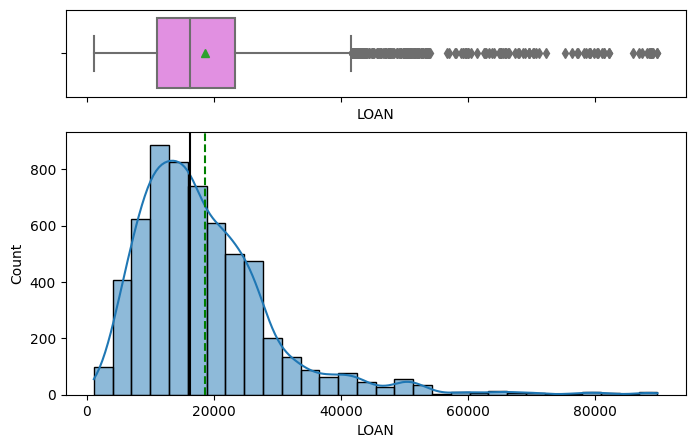

In [23]:
# Observations on LOAN
histogram_boxplot(data, 'LOAN', kde = True, bins=30)

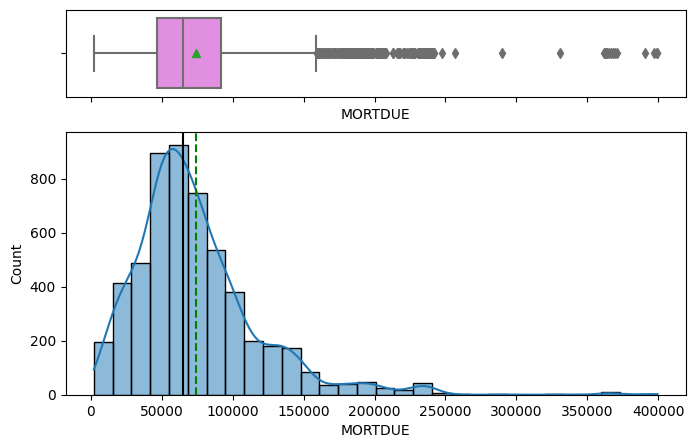

In [24]:
# Observations on MORTDUE
histogram_boxplot(data, 'MORTDUE', kde = True, bins=30)

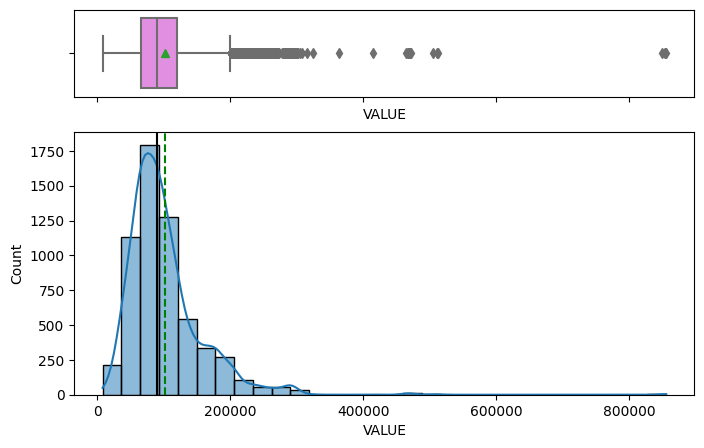

In [25]:
# Observations on VALUE
histogram_boxplot(data, 'VALUE', kde = True, bins=30)

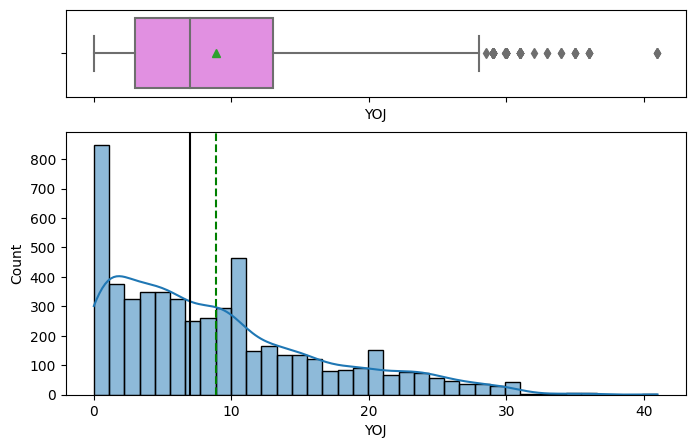

In [26]:
# Observations on YOJ
histogram_boxplot(data, 'YOJ', kde = True)

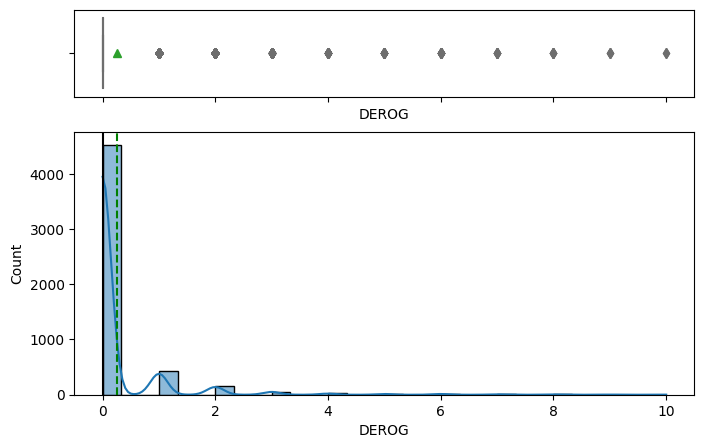

In [27]:
# Observations on DEROG
histogram_boxplot(data, 'DEROG', kde = True, bins=30)

In [28]:
data.DEROG.value_counts()

0.00     4527
1.00      435
2.00      160
3.00       58
4.00       23
5.00       15
6.00       15
7.00        8
8.00        6
9.00        3
10.00       2
Name: DEROG, dtype: int64

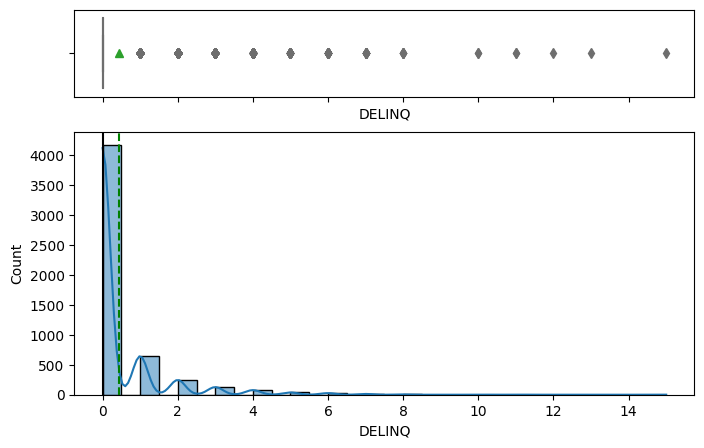

In [29]:
# Observations on DELINQ
histogram_boxplot(data, 'DELINQ', kde = True, bins=30)

In [30]:
data.DELINQ.value_counts(ascending=False)

0.00     4179
1.00      654
2.00      250
3.00      129
4.00       78
5.00       38
6.00       27
7.00       13
8.00        5
10.00       2
11.00       2
15.00       1
12.00       1
13.00       1
Name: DELINQ, dtype: int64

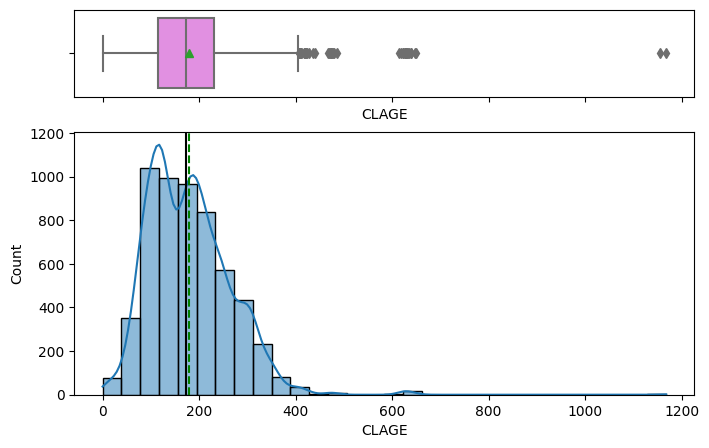

In [31]:
# Observations on CLAGE
histogram_boxplot(data, 'CLAGE', kde = True, bins=30)

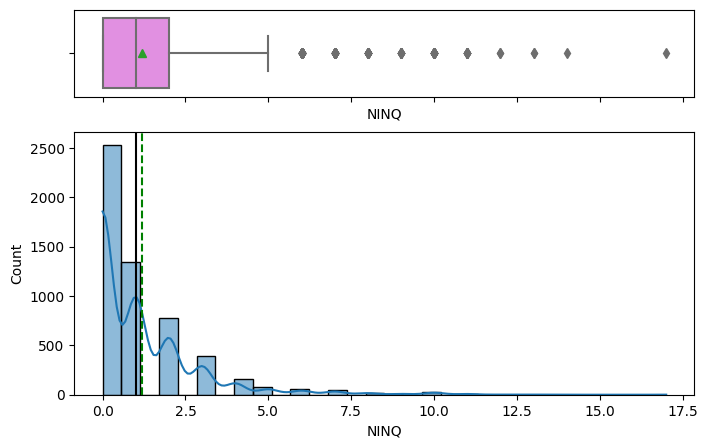

In [32]:
# Observations on NINQ
histogram_boxplot(data, 'NINQ', kde = True, bins=30)

In [33]:
data.NINQ.value_counts()

0.00     2531
1.00     1339
2.00      780
3.00      392
4.00      156
5.00       75
6.00       56
7.00       44
10.00      28
8.00       22
9.00       11
11.00      10
12.00       2
13.00       2
14.00       1
17.00       1
Name: NINQ, dtype: int64

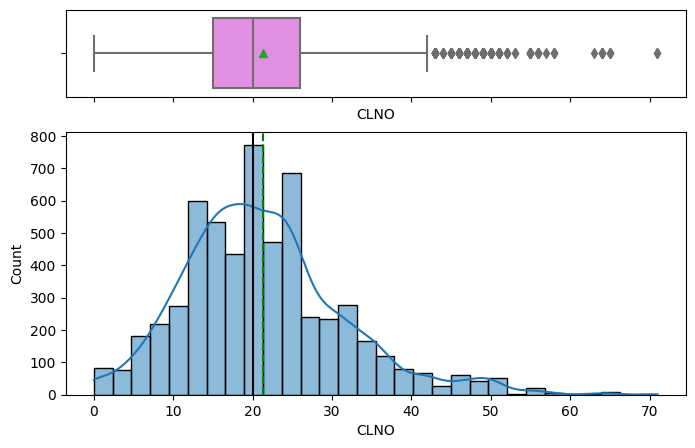

In [34]:
# Observations on CLNO
histogram_boxplot(data, 'CLNO', kde = True, bins=30)

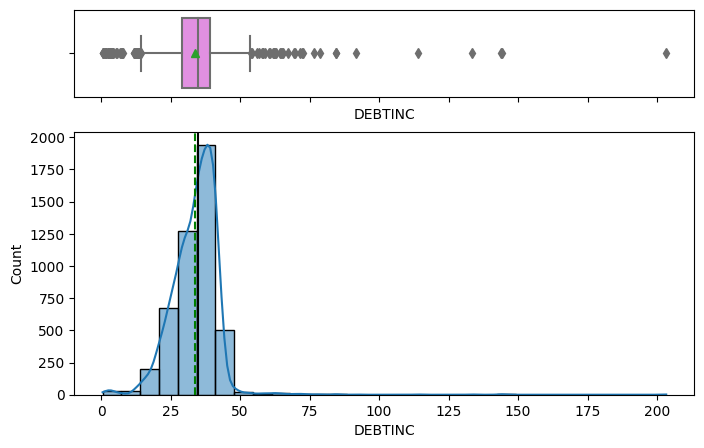

In [35]:
# Observations on DEBTINC
histogram_boxplot(data, 'DEBTINC', kde = True, bins=30)

**We visualize the categorical values we had seen previously.**

In [36]:
# Function to plot a barplot along the same scale
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (4, 3))
    plt.xticks(rotation=0)

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(
            percentage,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points",
        )                # Annotate the percentage

    plt.show()

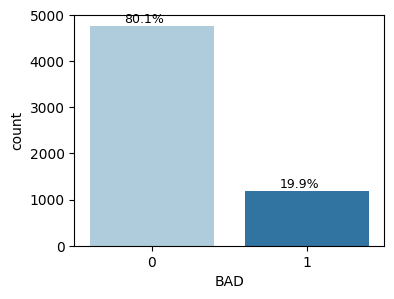

In [37]:
# Observations on BAD
bar_perc(data, 'BAD')

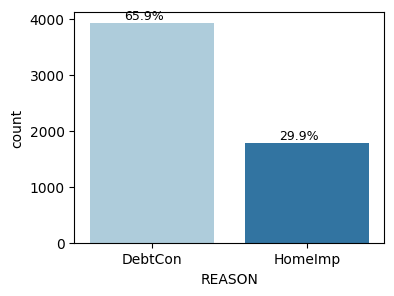

In [38]:
# Observations on REASON
bar_perc(data, 'REASON')

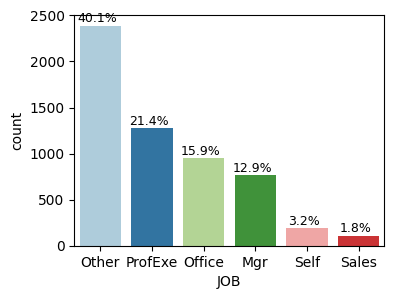

In [39]:
# Observations on JOB
bar_perc(data, 'JOB')

**OBSERVATIONS ON UNIVARIATE ANALYSIS**


* The LOAN distribution is right squewed with outliers on the maximum side loan.
* The MOTDUE distribution is also right squewed with outliers, similar distribution than the LOAN.
* The VALUE distribution is very right squewed with outliers.
* The YOJ distribution shows that the highest count of applicants have less than 1 year in their current job. Applicants tend to apply for credit cards at a very early stage of their careers and again after 11 years been on job. It is right squewed and shows outliers.
* The DEROG distribution shows that 86% of applicants do not have any derogatory report and some 2 applicants have up to 10 reports. Due to the very right squewed distribution, we will look at outliers also.
* The DELINQ distribution also shows that 78% of applicants do not have a delinquen credit line but some applicants do up to 15 credit lines.
* The CLAGE distribution is also right squewed with a more regular mean / median separation, but also with outliers. Most of applicants finish to pay the loan aroundd 400 months (33 years)
* The NINQ distribution is also right squewed with 46% of applicants that apply for credit for the 1st time while some clients have applied up to 17 times. Shows outliers.
* The CLNO shows an almost normal distribution with a peak amount of applicants on its median and close to its mean : 21 credit lines open. We have some outliers.
* The DEBTINC ratio distribution shows outliers on both the minimum and maximum sides. The lower the ration, the better the lenders measures a borrower´s ability to manage the monthly payment to repay the money they plan to borrow.
* The BAD shows that 80.1% of applicants repaid the loan, while 19.9% of applicants defaulted on loan. 20% of applicants have defaulted to pay the loan.
* The REASON of the loan request has 2 unique categories : 65.9% for Debt Consolidation and 29.9% for Home Improvement. Which means that 69% of loan applicants are taking out a new loan to pay off other liabilities and consumer debts.
* The type of JOB that loan applicant has is mainly Other with 40%, the ProfExe with 21%, Office with 16%, Mgr with 13% and lastly Self with 3% and Sales with 2%.
* It would be recommended to add more significant job categories to look deeper into the Other Job segment.

### **Bivariate Analysis and Multivariate Analysis**

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset.

<Figure size 1000x1000 with 0 Axes>

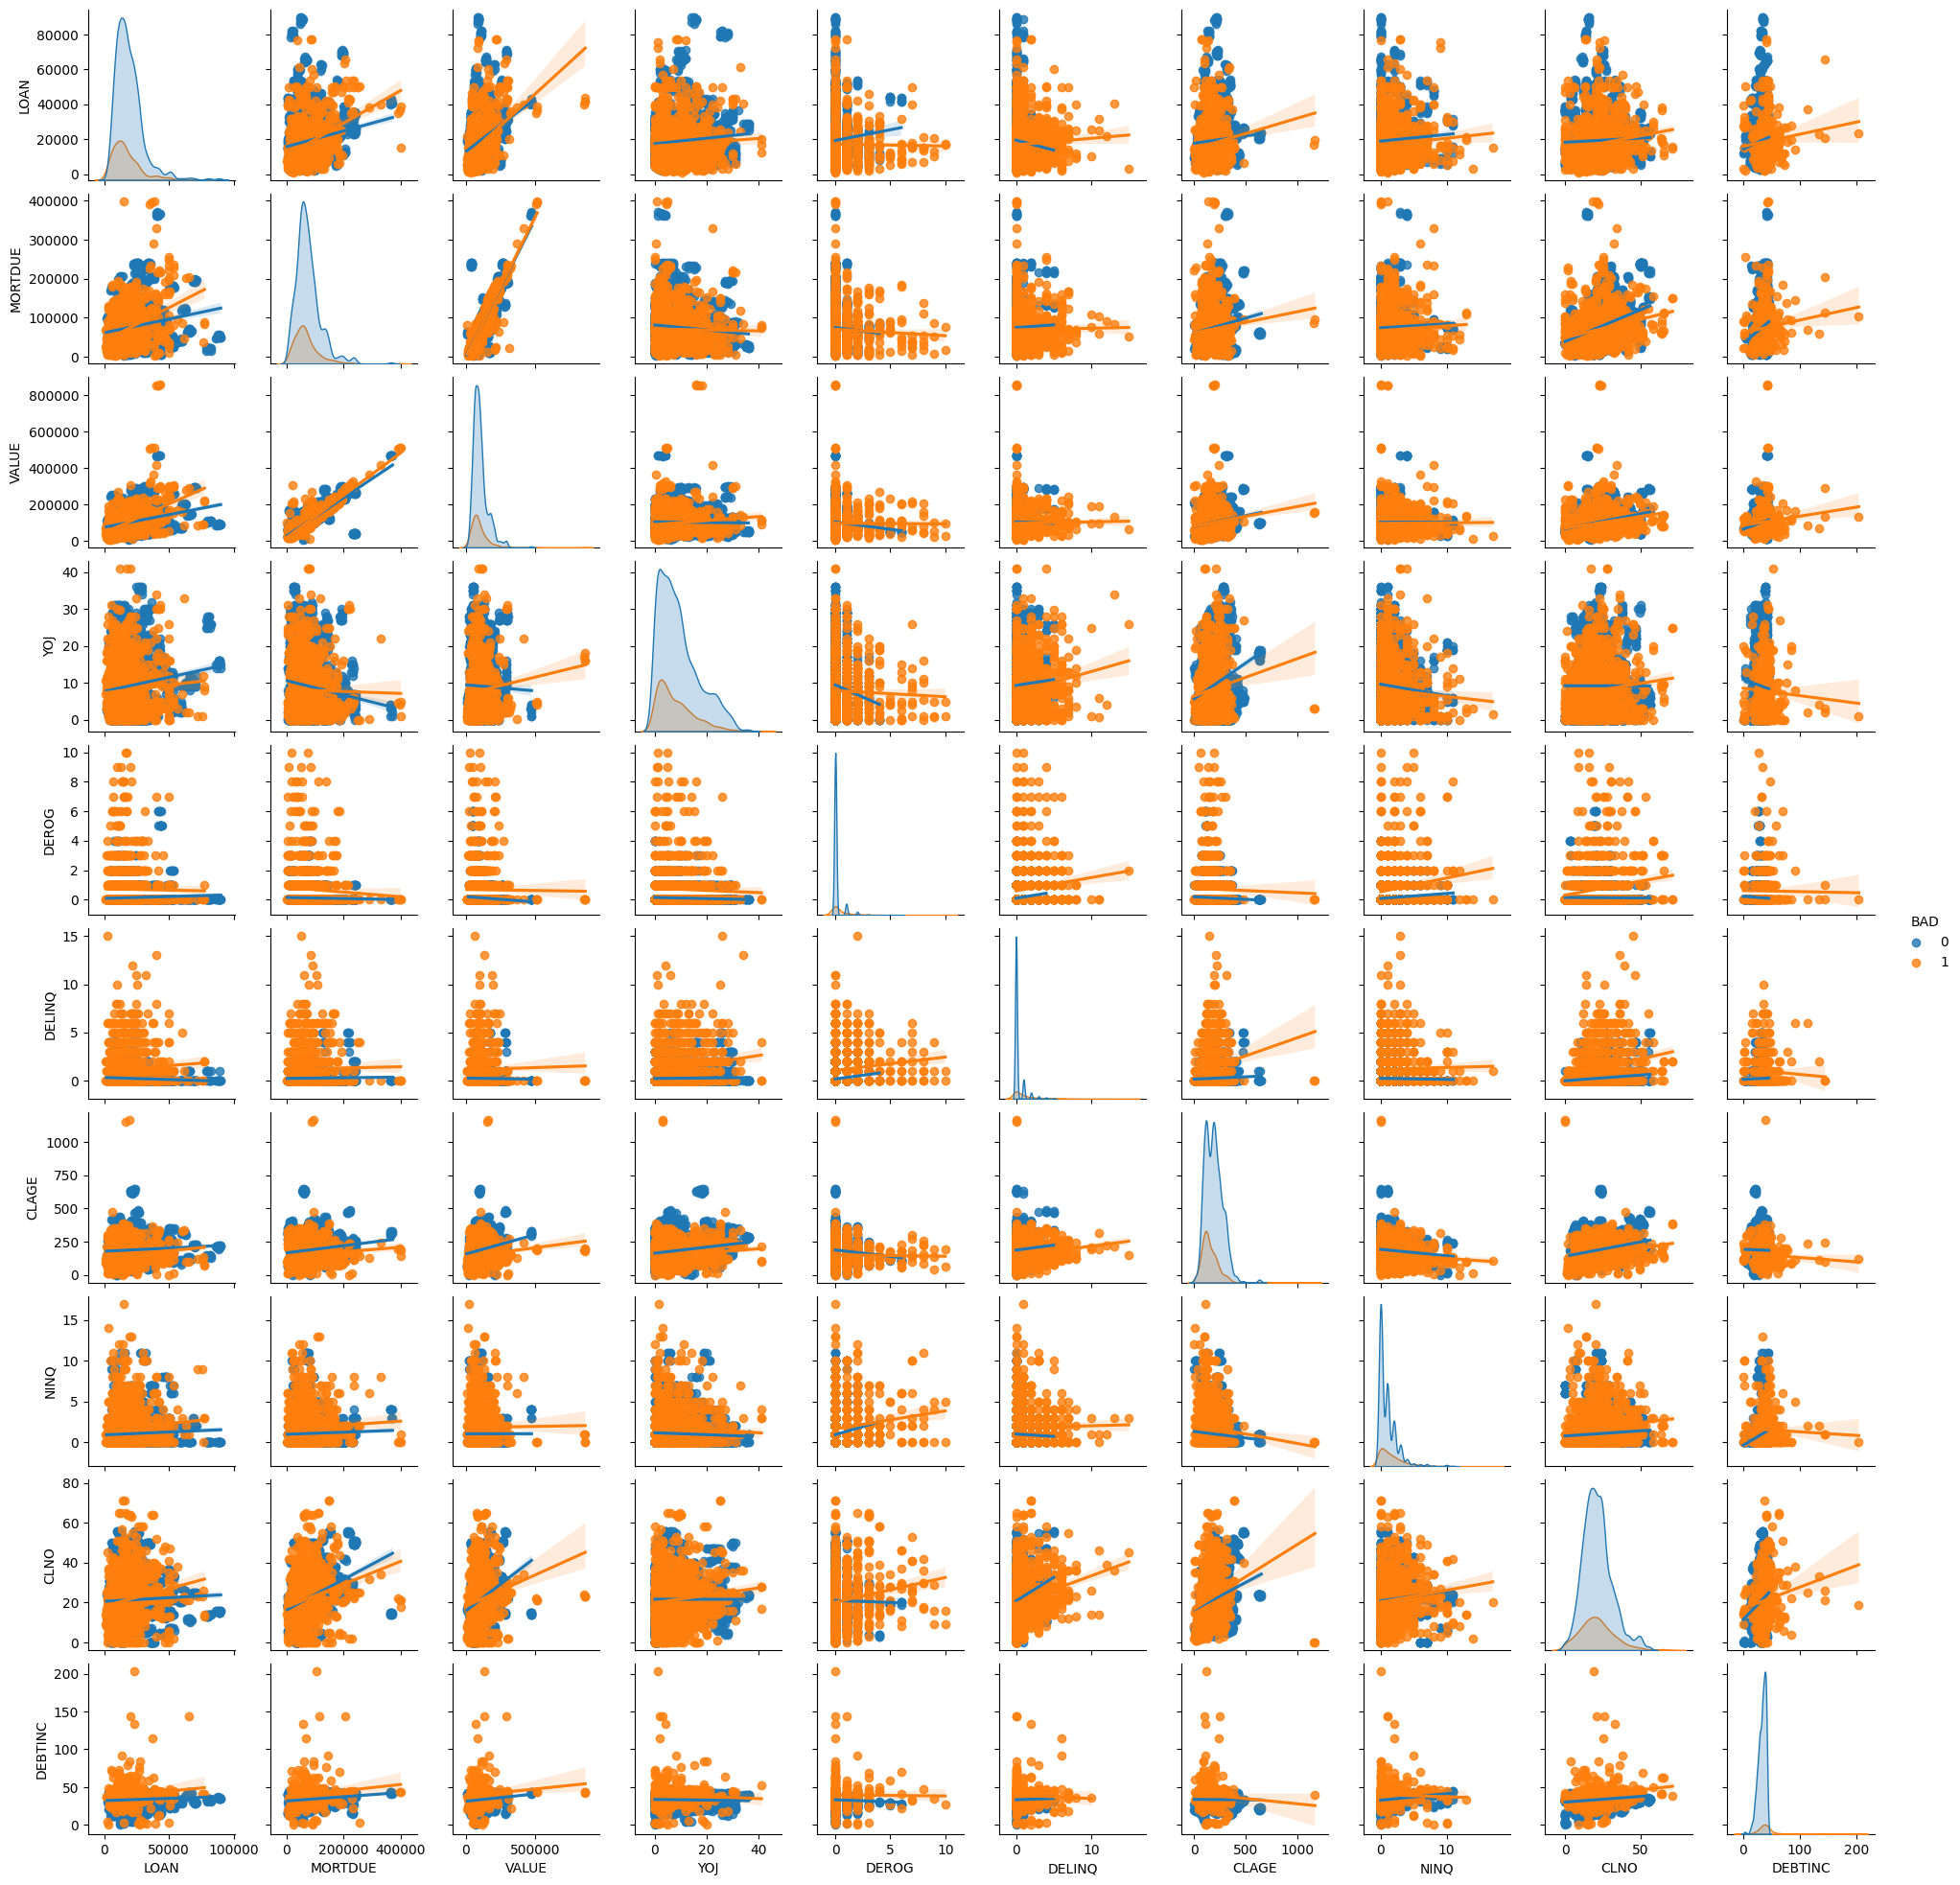

In [40]:
# Checking any correlation between variables.
plt.figure(figsize = (10, 10))
sns.pairplot(data, size=2, hue = 'BAD', kind="reg");

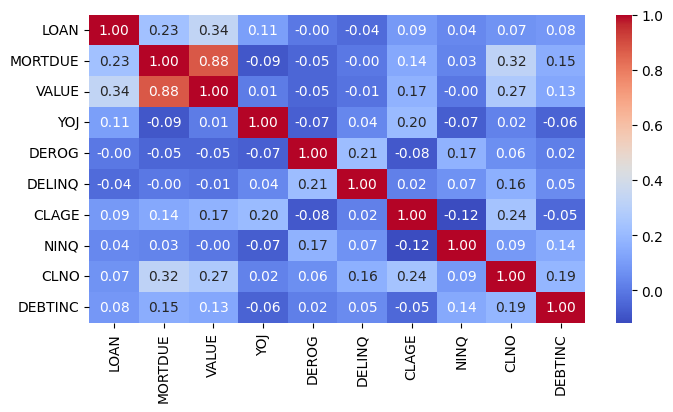

In [41]:
# Checking any correlation between variables.
plt.figure(figsize = (8, 4))
sns.heatmap(data.corr(), annot = True,  fmt = '0.2f', cmap = 'coolwarm');

**OBSERVATIONS**

- We can see high correlation between the following variables VALUE and MORTDUE (0.88). There is a slighly less correlation between VALUE and LOAN (0.34) and also a slighly correlation between CLNO and MORTDUE (0.32).


**Creating functions that will help us with further analysis vs. target variable.**

In [42]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 3))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title='BAD')
    plt.show()

BAD         0     1   All
REASON                   
All      4567  1141  5708
DebtCon  3183   745  3928
HomeImp  1384   396  1780
------------------------------------------------------------------------------------------------------------------------


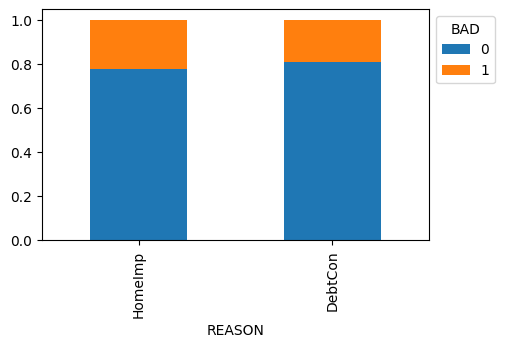

In [43]:
# Observations on REASON and BAD
stacked_barplot(data, "REASON", "BAD")

BAD         0     1   All
JOB                      
All      4515  1166  5681
Other    1834   554  2388
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109
------------------------------------------------------------------------------------------------------------------------


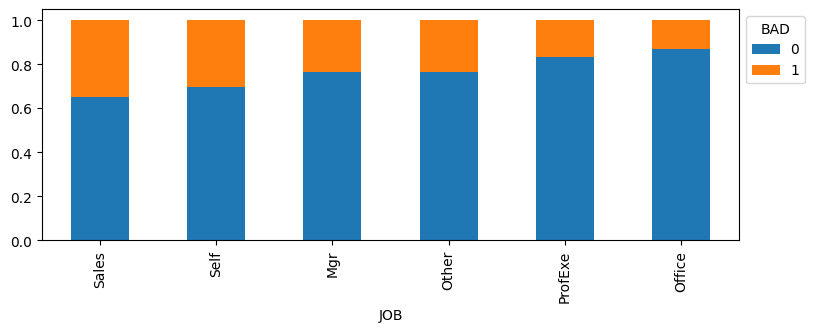

In [44]:
# Observations on JOB and BAD
stacked_barplot(data, "JOB", "BAD")

In [45]:
# Checking the average ratio from the loan approved amount to the amount due on the existing mortgage
round(data.LOAN.mean() / data.MORTDUE.mean(),2)

0.25

In [46]:
# Checking the average ratio from the loan approved amount to the value of the property
round(data.LOAN.mean() / data.VALUE.mean(),2)

0.18

In [47]:
# The mean of numerical variables grouped by BAD
data.groupby(['BAD'])[num_col].mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
0,19028.11,74829.25,102595.92,9.15,0.13,0.25,187.00,1.03,21.32,33.25
1,16922.12,69460.45,98172.85,8.03,0.71,1.23,150.19,1.78,21.21,39.39


In [48]:
# The mean of numerical variables grouped by REASON
data.groupby(['REASON'])[num_col].mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
REASON,,,,,,,,,,
DebtCon,19952.95,74736.55,102172.96,8.63,0.26,0.44,175.62,1.34,22.15,34.31
HomeImp,16006.63,72029.33,101675.09,9.48,0.24,0.45,186.41,0.86,19.60,33.28


In [49]:
# The mean of numerical variables grouped by JOB
data.groupby(['JOB'])[num_col].mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
JOB,,,,,,,,,,
Mgr,19155.28,82295.01,108628.26,9.32,0.34,0.63,174.48,1.51,22.89,35.28
Office,18142.62,66757.14,94081.82,8.35,0.15,0.45,179.49,0.93,21.19,34.33
Other,18061.68,59337.15,84787.50,9.46,0.30,0.42,173.52,1.32,19.26,34.24
ProfExe,18983.46,94959.64,131118.20,8.75,0.18,0.42,197.91,0.98,24.50,32.54
Sales,14913.76,82266.18,108449.59,6.80,0.44,0.29,195.30,0.75,24.88,37.53
Self,28314.51,99776.19,149734.11,7.07,0.24,0.58,174.54,1.36,23.03,35.57


**Distribution of variables behaviour depending on Defaulted or Paid loan.**

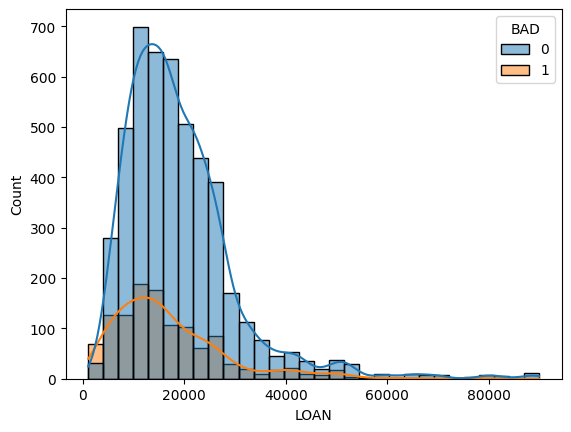

In [50]:
# Observations on LOAN and BAD
sns.histplot(data=data, x='LOAN', hue='BAD', kde = True, bins = 30);

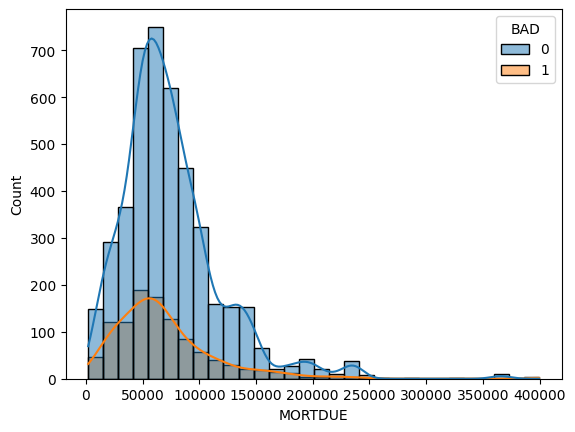

In [51]:
# Observations on MORTDUE and BAD
sns.histplot(data=data, x='MORTDUE', hue='BAD', kde = True, bins = 30);

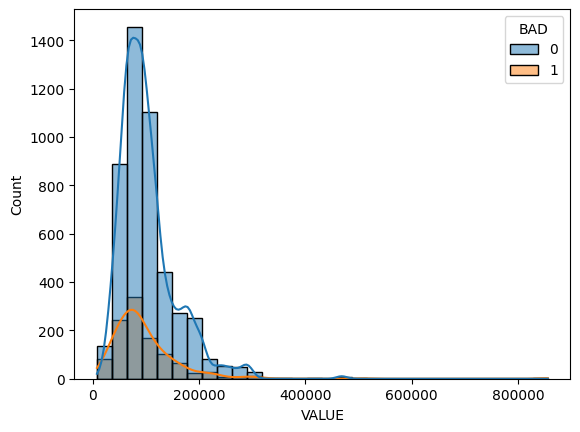

In [52]:
# Observations on VALUE and BAD
sns.histplot(data=data, x='VALUE', hue='BAD', kde = True, bins = 30);

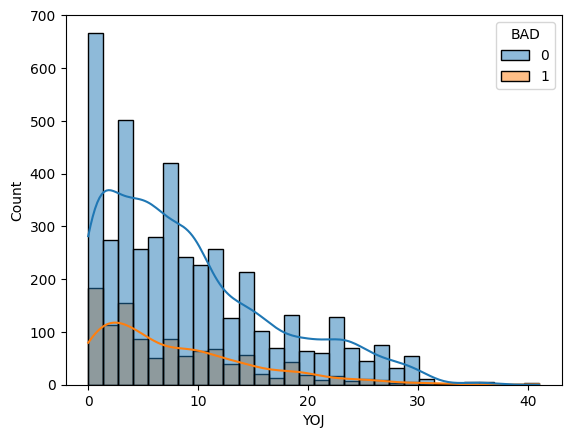

In [53]:
# Observations on YOJ and BAD
sns.histplot(data=data, x='YOJ', hue='BAD', kde = True, bins = 30);

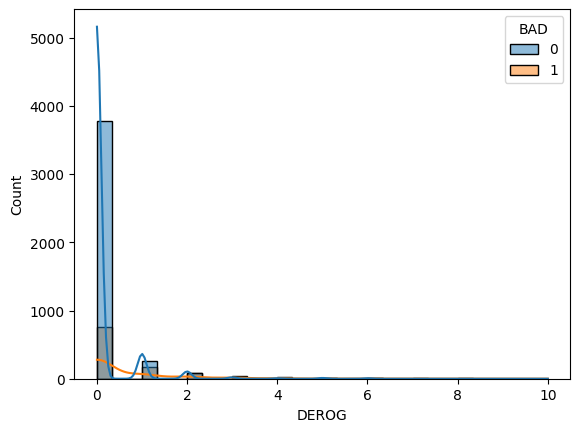

In [54]:
# Observations on DEROG and BAD
sns.histplot(data=data, x='DEROG', hue='BAD', kde = True, bins = 30);

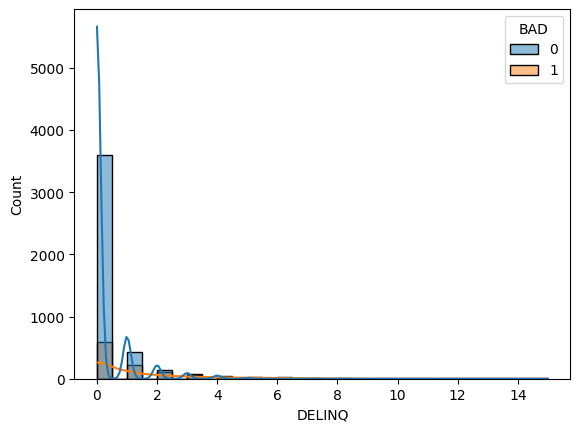

In [55]:
# Observations on DELINQ and BAD
sns.histplot(data=data, x='DELINQ', hue='BAD', kde = True, bins = 30);

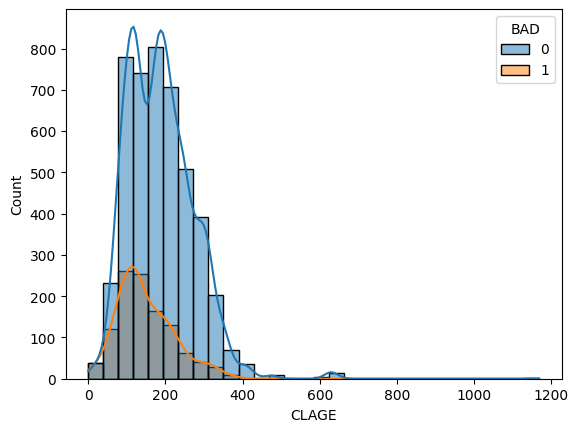

In [56]:
# Observations on CLAGE and BAD
sns.histplot(data=data, x='CLAGE', hue='BAD', kde = True, bins = 30);

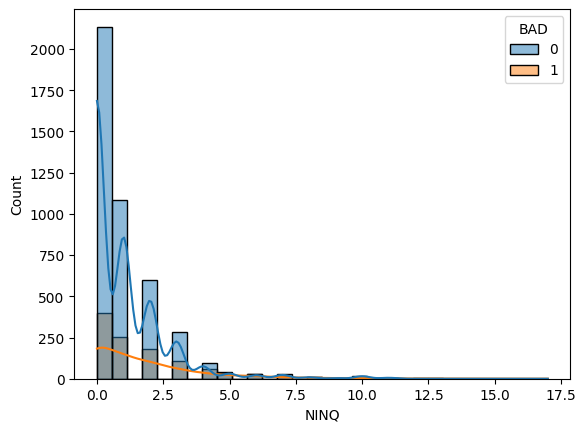

In [57]:
# Observations on NINQ and BAD
sns.histplot(data=data, x='NINQ', hue='BAD', kde = True, bins = 30);

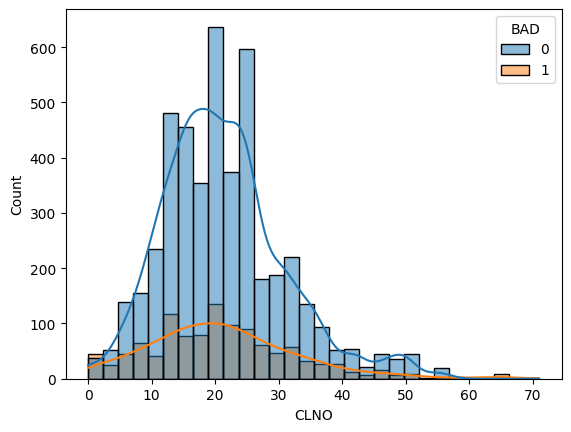

In [58]:
# Observations on CLNO and BAD
sns.histplot(data=data, x='CLNO', hue='BAD', kde = True, bins = 30);

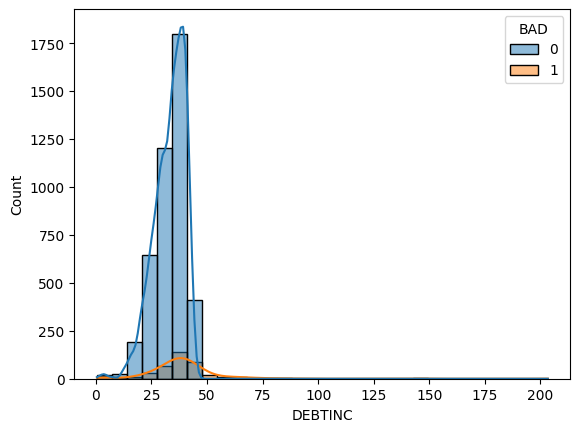

In [59]:
# Observations on DEBTINC and BAD
sns.histplot(data=data, x='DEBTINC', hue='BAD', kde = True, bins = 30);

**OBSERVATIONS ON BIVARIATE AND MULTIVARIATE ANALYSIS**

- We can see high correlation between the following variables VALUE and MORTDUE (0.88). It reasonable to assume that not many loan applicants will have already paid off their mortgage and that if your property is worth more than the average property you would also have an above average outstanding mortgage amount.

- There is a slightly less correlation between VALUE and LOAN (0.34) which makes sense since it is a fundamental aspect of secured lending : the value of an asset is used as collateral to secure the loan, mitigate risk, and determine loan amounts and interest rates. This relationship is important for both borrowers and lenders in secured lending transactions.

- There is also a slightly correlation between CLNO and MORTDUE (0.32). Compared to the two above, this correlation does not imply causation : having a higher number of credit lines does not directly cause someone to have a larger mortgage debt, but these variables are often related due to shared financial factors and responsible financial behavior.

* For REASON, eventhough we saw that 65.9% of loan are asked for Debt Consolidation, the proportion of applicants defaulted on loan is the same as Home Improvement.

* On the JOB side, the proportion of applicants is more likely to pay the loan while working in Office, ProfExe and Other, Mgr. Sales has the highest proportion of applicants defaulted on loan.

- Looking at the mean of numerical variables grouped by defaulted or paid loan, we can see that applicants that defaulted have a lower : LOAN, MORTDUE, VALUE, YOJ, CLAGE compared to applicants that paid the loan. Almost the same CLNO. And a higher DEROG, DELINQ, NINQ, DEBTINC.

- Grouped by REASON to borrow, the DebtCon which is the major reason to apply for loan has much higher LOAN and MORTDUE, NINQ, CLNO compared to HomeImp, while its VALUE is pretty similar. It seems like banks take more risks on DebtCon applicants.

- Grouped by JOB, Self employed applicants are looking for a much higher LOAN, MORTDUE and VALUE compared to other JOB while their DEBTINC is on average.

* The applicants who default have a significantly same distribution of LOAN amount compared to those who repay their loan.
* Same observation for MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLNO, showing a pattern
* For CLAGE, the peak for defaulted on loan is close to 150 months, when the loan repaired applicants come later (200-250 months).
* For NINQ, it shows that applicants are more likely to pay the loan when they have applied several times. The highest number for default is on their first credit inquiry.
* For DEBTINC,  it shows that applicants are more likely to default the loan when they reach index around 40. They are more likely before and after.




### **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

* We have seen that 20% of applicants have defaulted to pay the loan.

* We can see high correlation between the following variables VALUE and MORTDUE (0.88). It reasonable to assume that not many loan applicants will have already paid off their mortgage and that if your property is worth more than the average property you would also have an above average outstanding mortgage amount.

* There is a slightly less correlation between VALUE and LOAN (0.34) which makes sense since it is a fundamental aspect of secured lending : the value of an asset is used as collateral to secure the loan, mitigate risk, and determine loan amounts and interest rates. This relationship is important for both borrowers and lenders in secured lending transactions.

* There is also a slightly correlation between CLNO and MORTDUE (0.32). Compared to the two above, this correlation does not imply causation : having a higher number of credit lines does not directly cause someone to have a larger mortgage debt, but these variables are often related due to shared financial factors and responsible financial behavior.

* The REASON of the loan request has 2 unique categories : 65.9% for Debt Consolidation and 29.9% for Home Improvement. Which means that 69% of loan applicants are taking out a new loan to pay off other liabilities and consumer debts; while the proportion of applicants defaulted on loan is the same as Home Improvement.
* Grouped by REASON to borrow, the DebtCon which is the major reason to apply for loan has much higher LOAN and MORTDUE, NINQ, CLNO compared to HomeImp, while its VALUE is pretty similar. It seems like banks take more risks on DebtCon applicants.

* On the JOB side, the proportion of applicants is more likely to pay the loan while working in Office, ProfExe and Other, Mgr. Sales has the highest proportion of applicants defaulted on loan. And since 40% of loan applicants have Other as job segment, it would be recommended to add more significant job categories to look deeper into the Other Job segment to be able to target better this variable.
* Grouped by JOB, Self employed applicants are looking for a much higher LOAN, MORTDUE and VALUE compared to other JOB while their DEBTINC is on average.

* The YOJ distribution shows that the highest count of applicants have less than 1 year in their current job. Applicants tend to apply for credit cards at a very early stage of their careers and again after 11 years been on job.

* Looking at the mean of numerical variables grouped by defaulted or paid loan, we can see that applicants that defaulted have a lower : LOAN, MORTDUE, VALUE, YOJ, CLAGE compared to applicants that paid the loan. Almost the same CLNO. And a higher DEROG, DELINQ, NINQ, DEBTINC.

* For CLAGE, the peak for defaulted on loan is close to 150 months, when the loan repaired applicants come later (200-250 months).
* For NINQ, it shows that applicants are more likely to pay the loan when they have applied several times. The highest number for default is on their first credit inquiry.

- All numerical variables present outliers andany variable show missing data. We will treat both situations in the next part.



## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Data Preparation

In [60]:
# Creating the copy of the dataframe
df1 = data.copy()

This dataset contains both numerical and categorical variables. We need to treat them first before we pass them onto the model.
We will perform the below pre-processing steps:

- Dummy of categorical variables
- Scaling numerical variables


**IMPORTANT : AVOIDING DATA LEAKAGE**

Before we scale numerical variables, we would first split the dataset into train and test datasets and perform scaling separately. Otherwise, we would be leaking information from the test data to the train data and the resulting model might give a false sense of good performance.
**This is known as data leakage which we would like to avoid.**

**Creating dummy variables for categorical Variables**

We will be using the get dummy technique to encode the values of the categorical columns in the train and test datasets.

In [61]:
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON','JOB']

In [62]:
# Creating dummy variables
data = pd.get_dummies(data, columns = to_get_dummies_for, drop_first = True)

In [63]:
# Checking dummy variables are well applied on datasets
data.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.00,39025.00,10.50,0.00,0.00,94.37,1.00,9.00,NaN,1,0,1,0,0,0
1,1,1300,70053.00,68400.00,7.00,0.00,2.00,121.83,0.00,14.00,NaN,1,0,1,0,0,0
2,1,1500,13500.00,16700.00,4.00,0.00,0.00,149.47,1.00,10.00,NaN,1,0,1,0,0,0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,0,1700,97800.00,112000.00,3.00,0.00,0.00,93.33,0.00,14.00,NaN,1,1,0,0,0,0


In [64]:
# Changing type of BAD in integer
data['BAD'] = data['BAD'].astype(int)

**Separating the independent variables (X) and the dependent variable (Y)**

In [65]:
# Separating the target variable and other variables
Y = data[['BAD']]
X = data.drop(columns = ['BAD'], axis=1)

**Splitting the data into 70% train and 30% test sets**

In [66]:
# Splitting the data into 70% train and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [67]:
# Checking the shape of train and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4172, 16)
(1788, 16)
(4172, 1)
(1788, 1)


###Scaling the data

**Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is Feature Scaling, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the Standard Scaler method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of sample x is calculated as:    z = (x - u) / s
where u is the mean of the training samples (zero) and s is the standard deviation of the training samples.


**Why we standarize first and then treat outliers ?**

**Since the standarization of a continuous variable extracts the mean, it changes the distribution and what seems to be outliers may become normal points.**



In [68]:
# Scaling the data
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = X.columns)

x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = X.columns)

### Treating Outliers

**What is an Outlier ?**

- An outlier is a data point that are abnormally/unrealistically distant from other points in the data.

- The challenge with outlier detection is determining if a point is truly a problem or simply a large value. If a point is genuine then it is very important to keep it in the data as otherwise we're removing the most interesting data points.

- It is left to the best judgement of the investigator to decide whether treating outliers is necessary and how to go about it. Domain Knowledge and impact of the business problem tend to drive this decision.

**Handling outliers**

Some of the commonly methods to deal with the data points that we actually flag as outliers are:

- Replacement with null values - We can consider these data points as missing data and replace the abnormal values with NaNs.
- IQR method - Replace the data points with the lower whisker (Q1 - 1.5 * IQR) or upper whisker (Q3 + 1.5 * IQR) value.
- We can also drop these observations, but we might end up with losing other relevant observations as well.



**Let's visualize all the outliers present in data together**

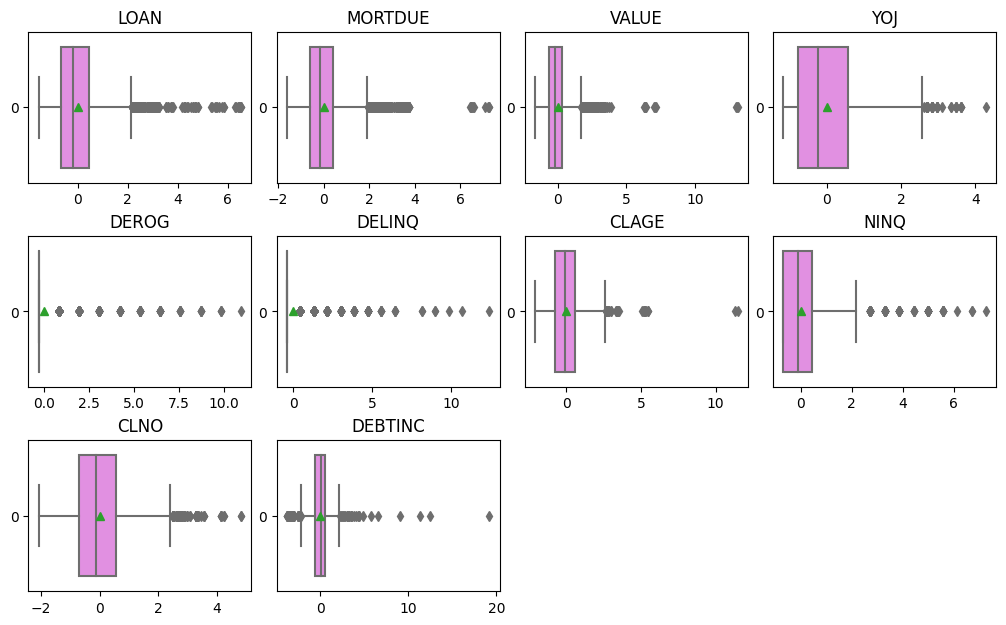

In [69]:
# Outlier detection using boxplot from numerical variables.
plt.figure(figsize=(10, 8))

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x_train_scaled[variable], whis=1.5, showmeans = True, color = 'violet', orient="h")
    plt.title(variable)
    plt.tight_layout(pad=0.5)

plt.show()



We can see that all the numerical features in the data set have outliers present in them.

In [70]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = x_train_scaled[num_col].quantile(0.25)
Q3 = x_train_scaled[num_col].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [71]:
# Percentage of outliers in each column
((x_train_scaled[num_col] < lower_whisker) | (x_train_scaled[num_col] > upper_whisker)).sum()/data.shape[0]*100

LOAN       2.67
MORTDUE    2.73
VALUE      3.57
YOJ        1.02
DEROG      8.74
DELINQ    14.31
CLAGE      0.54
NINQ       2.21
CLNO       1.93
DEBTINC    1.22
dtype: float64

Let's analyze each column to see if the values in them can be considered as outliers or not.

Looking at all numerical values with outliers, we will go with the IQR method - Replace the data points with the lower whisker (Q1 - 1.5 * IQR) or upper whisker (Q3 + 1.5 * IQR) value : all the values samller than Lower_Whisker will be assigned value of Lower_whisker and all the values above upper_whishker will be assigned value of upper_Whisker.

**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using Q1 - 1.5 x IQR and Q3 + 1.5 x IQR, respectively.

**Creating a function to floor and cap/clip outliers in a column**

In [72]:
# Create a function to floor and cap/clip outliers in a column
def treat_outliers(data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    data: dataframe
    col: name of the column
    """
    Q1 = x_train_scaled[col].quantile(0.25)  # 25th quantile
    Q3 = x_train_scaled[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    x_train_scaled[col] = np.clip(x_train_scaled[col], lower_whisker, upper_whisker)

    return data

In [73]:
# Treating outliers of numerical variables
x_train_scaled = treat_outliers(x_train_scaled,'LOAN')
x_train_scaled = treat_outliers(x_train_scaled,'MORTDUE')
x_train_scaled = treat_outliers(x_train_scaled,'VALUE')
x_train_scaled = treat_outliers(x_train_scaled,'YOJ')
x_train_scaled = treat_outliers(x_train_scaled,'DEROG')
x_train_scaled = treat_outliers(x_train_scaled,'DELINQ')
x_train_scaled = treat_outliers(x_train_scaled,'CLAGE')
x_train_scaled = treat_outliers(x_train_scaled,'NINQ')
x_train_scaled = treat_outliers(x_train_scaled,'CLNO')
x_train_scaled = treat_outliers(x_train_scaled,'DEBTINC')

**Let's visualize numerical columns where outliers were treated**

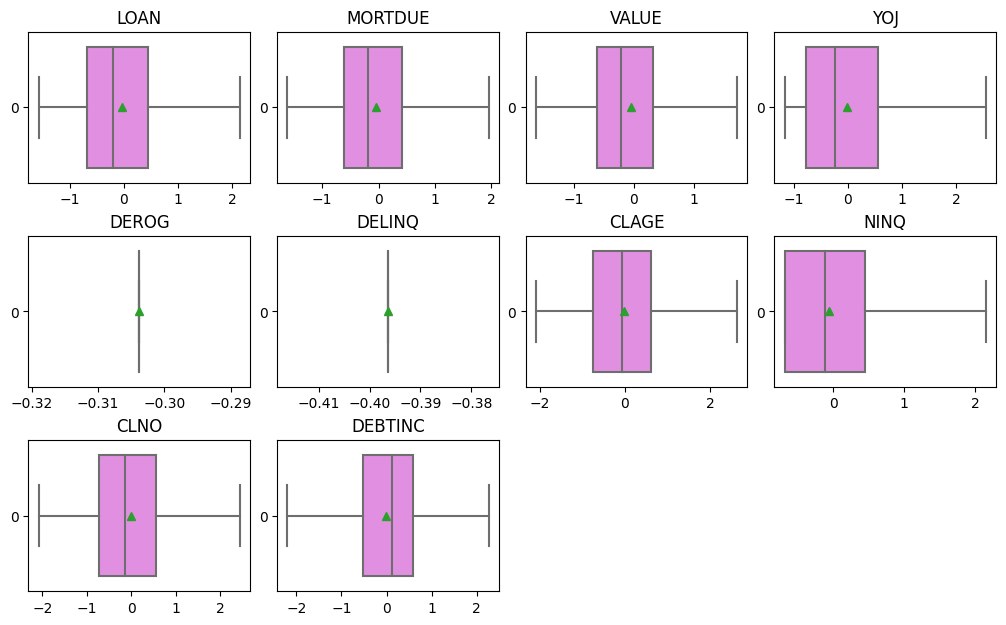

In [74]:
# Outlier detection using boxplot from numerical variables.
plt.figure(figsize=(10, 8))

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x_train_scaled[variable], whis=1.5, showmeans = True, color = 'violet', orient="h")
    plt.title(variable)
    plt.tight_layout(pad=0.5)

plt.show()

**OBSERVATIONS**

- All the outliers have been treated.
- We observe that the data type for BAD, REASON and JOB has changed to Category which we should change to the object type.

In [75]:
# Changing REASON and JOB to object in the train and test data
x_train_scaled['REASON_HomeImp'] = x_train_scaled['REASON_HomeImp'].astype('category')
x_train_scaled['JOB_Office'] = x_train_scaled['JOB_Office'].astype('category')
x_train_scaled['JOB_Other'] = x_train_scaled['JOB_Other'].astype('category')
x_train_scaled['JOB_ProfExe'] = x_train_scaled['JOB_ProfExe'].astype('category')
x_train_scaled['JOB_Sales'] = x_train_scaled['JOB_Sales'].astype('category')
x_train_scaled['JOB_Self'] = x_train_scaled['JOB_Self'].astype('category')

x_test_scaled['REASON_HomeImp'] = x_test_scaled['REASON_HomeImp'].astype('category')
x_test_scaled['JOB_Office'] = x_test_scaled['JOB_Office'].astype('category')
x_test_scaled['JOB_Other'] = x_test_scaled['JOB_Other'].astype('category')
x_test_scaled['JOB_ProfExe'] = x_test_scaled['JOB_ProfExe'].astype('category')
x_test_scaled['JOB_Sales'] = x_test_scaled['JOB_Sales'].astype('category')
x_test_scaled['JOB_Self'] = x_test_scaled['JOB_Self'].astype('category')

**Let's have a look at the missing values of our dataset**

### Treating Missing Values




**How to treat missing values?**

One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.

* `Replacing with mean`: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations.

* `Replacing with median`: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.

* `Replacing with mode`: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

* Other methods include k-NN, MICE, SMOTE, deep learning, ...

**Limitations of imputing missing values with central tendencies**

* When we impute the missing values with central tendencies the original distribution of the feature can get distorted.
* After imputation with the central value the variance and standard deviation of a feature can get drastically impacted.
* The impact of distortion is higher with higher percentage of missing values.

So, before directly imputing the missing values with central values of column we should investigate the missing data closely to observe the pattern of missing values, and then take a decision to impute the missing value with appropriate measure.

**Lets see the count and the percentage of missing values in each column**

In [76]:
# x_train_scaled.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':x_train_scaled.isnull().sum()[x_train_scaled.isnull().sum()>0],'Percentage':(x_train_scaled.isnull().sum()[x_train_scaled.isnull().sum()>0]/x_train_scaled.shape[0])*100})

,Count,Percentage
MORTDUE,333,7.98
VALUE,76,1.82
YOJ,346,8.29
DEROG,498,11.94
DELINQ,403,9.66
CLAGE,214,5.13
NINQ,349,8.37
CLNO,150,3.60
DEBTINC,894,21.43


- DEBTINC and DEROG have the highest percentage of missing values.
- VALUE and CLNO have the least number of missing values.
- All of them have a high number of missing values, so this can not be handled individually by rows.

In [77]:
# extracting all the information of other variable where CLNO is null
x_train_scaled.loc[x_train_scaled['CLNO'].isnull()==True]

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
35,-0.78,NaN,-0.92,NaN,NaN,NaN,NaN,NaN,NaN,-2.06,-0.65,-0.43,-0.83,-0.52,-0.14,-0.18
60,0.48,0.68,0.73,NaN,NaN,NaN,NaN,NaN,NaN,0.34,1.54,-0.43,-0.83,-0.52,-0.14,-0.18
122,0.33,0.22,-0.08,-0.10,NaN,NaN,NaN,NaN,NaN,NaN,1.54,-0.43,-0.83,-0.52,-0.14,-0.18
149,-0.94,NaN,-0.92,NaN,NaN,NaN,NaN,NaN,NaN,-2.20,-0.65,-0.43,-0.83,-0.52,-0.14,-0.18
161,-0.78,-0.97,-0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.65,-0.43,-0.83,-0.52,-0.14,-0.18
169,0.65,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,-2.19,-0.65,-0.43,-0.83,-0.52,-0.14,-0.18
175,-1.10,0.15,-0.08,-1.04,NaN,NaN,NaN,NaN,NaN,-0.37,-0.65,-0.43,-0.83,1.91,-0.14,-0.18
182,-0.15,0.10,0.33,NaN,NaN,NaN,NaN,NaN,NaN,-0.01,-0.65,-0.43,-0.83,-0.52,-0.14,-0.18
189,0.40,-0.48,-0.36,NaN,NaN,NaN,NaN,NaN,NaN,0.48,-0.65,-0.43,-0.83,-0.52,-0.14,-0.18
265,-0.60,0.25,0.36,0.16,NaN,NaN,NaN,NaN,NaN,0.64,1.54,-0.43,1.21,-0.52,-0.14,-0.18


- It looks like wherever CLNO is null the data points in other columns are also missing (DEROG, DELINQ, CLAGE and NINQ). Let's check this.

In [78]:
x_train_scaled.loc[x_train_scaled['CLNO'].isnull()==True,'DEROG'].value_counts(dropna=False)

NaN    150
Name: DEROG, dtype: int64

In [79]:
x_train_scaled.loc[x_train_scaled['CLNO'].isnull()==True,'DELINQ'].value_counts(dropna=False)

NaN    150
Name: DELINQ, dtype: int64

In [80]:
x_train_scaled.loc[x_train_scaled['CLNO'].isnull()==True,'CLAGE'].value_counts(dropna=False)

NaN    150
Name: CLAGE, dtype: int64

In [81]:
x_train_scaled.loc[x_train_scaled['CLNO'].isnull()==True,'NINQ'].value_counts(dropna=False)

NaN    150
Name: NINQ, dtype: int64

- There seems to be a strong pattern in missing values, as wherever the CLNO column has missing data the other columns like DEROG, DELINQ, CLAGE and NINQ also have missing values.

**Impute missing values**

We will impute missing valued using
- Median for numerical values
- Mode for categorical values


In [82]:
# Looking at missing values of train and test dataset
x_train_scaled.isnull().sum()

LOAN                0
MORTDUE           333
VALUE              76
YOJ               346
DEROG             498
DELINQ            403
CLAGE             214
NINQ              349
CLNO              150
DEBTINC           894
REASON_HomeImp      0
JOB_Office          0
JOB_Other           0
JOB_ProfExe         0
JOB_Sales           0
JOB_Self            0
dtype: int64

In [83]:
print(x_test_scaled.isna().sum())

LOAN                0
MORTDUE           185
VALUE              36
YOJ               169
DEROG             210
DELINQ            177
CLAGE              94
NINQ              161
CLNO               72
DEBTINC           373
REASON_HomeImp      0
JOB_Office          0
JOB_Other           0
JOB_ProfExe         0
JOB_Sales           0
JOB_Self            0
dtype: int64


In [84]:
# Impute the missing values : Median for numerical values Mode for categorical values
imputer_mode_cat = SimpleImputer(strategy="most_frequent")
imputer_median_num = SimpleImputer(strategy="median")

# Fit and transform the train and test data
x_train_scaled[['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']] = imputer_median_num.fit_transform(x_train_scaled[['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']])
x_train_scaled[['REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']] = imputer_mode_cat.fit_transform(x_train_scaled[['REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']])

x_test_scaled[['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']] = imputer_median_num.fit_transform(x_test_scaled[['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']])
x_test_scaled[['REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']] = imputer_mode_cat.fit_transform(x_test_scaled[['REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']])

In [85]:
# Checking that no column has missing values in train and test sets
print(x_train_scaled.isna().sum())

LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_HomeImp    0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64


In [86]:
print(x_test_scaled.isna().sum())

LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_HomeImp    0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64


We have now no more missing values in our dataset.

### Building a model

**Classification algorythm**

To address this problem, to predict the target variables, we will use Classification algorythm.

We will use different approachs with linear and non-linear algorythms :    
- Logistic regression
- Decision tree
- Random Forest
- XGBoost

**Performance metrics selection**

A model can make wrong predictions in the following ways:

- Predicting an applicant will default on a loan, when he will pay it (False Negative - Type II error). *(the model predicts that a loan applicant should be denied (loan rejection) when, in reality, the applicant should have been approved (loan approval)).*
- Predicting an applicant will not default on a loan, when he will not pay it (False Positive - Type I error). *(the model predicts that a loan applicant should be approved (loan approval) when, in reality, the applicant should have been denied (loan rejection)).*

**Which case is more important?**

- If we predict that an applicant will not default on a loan, when he will not pay it. Allowing high-risk loans to be approved can lead to significant financial losses for the bank. This includes not only the principal amount of the loan but also potential interest and fees that may not be recovered.

- If we predict that an applicant will not default on a loan(loan not approved), when he will not pay it; the Bank will loose a valuable client and loose revenue opportunities.

Banks are in the business of managing financial risk. While minimizing False Positive is crucial, it's also important to strike a balance between risk and reward.
Banks may be willing to accept some level of False Negative (approving loans that may not default) as long as the overall default rate is manageable and the bank can generate revenue from interest and fees on approved loans.
Overly strict loan approval criteria can result in missed revenue opportunities.

Also financial institutions are subject to regulatory oversight and compliance considerations. They must comply with laws and regulations related to fair lending practices (ex: Equal Credit Opportunity Act (ECOA)). Overly aggressive loan rejection policies that lead to a high rate of False Negatives can raise concerns about fairness and compliance which are corporate core values of our regional bank.

Additionally, rejecting a large number of loan applications can lead to a poor customer experience and deter potential customers from doing business with the bank.

>> To summarize, while both False Positives and False Negatives are important to consider in our loan default prediction situation, banks often prioritize minimizing False Positive because of the significant financial risks associated with approving high-risk loans.
However, the specific trade-off between False Positives and False Negatives should be carefully evaluated based on the bank's risk tolerance, regulatory environment, and business objectives.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

**In our case study, we will take into account that the bank is a well implemented regional bank who wants to do a delicate balancing act between risk management and revenue generation since both errors are important for us to minimize. FairlyBank would want the F1 Score evaluation metric to be maximize instead of the Recall.
Hence, the focus should be on increasing the F1 score rather than focusing on just one metric (Recall or Precision).**


**F1 score in an Imbalanced dataset**

Additionally, since we are dealing with an imbalanced dataset ( 1:0.2 and 0:0.8), the F1 score combines two other fundamental classification metrics, precision and recall, into a single score, making it useful for assessing the performance of a classification model by giving more weight to lower values. It is a valuable metric for evaluating the overall performance of a  classification model, particularly when the class distribution is imbalanced and when both false positives and false negatives need to be considered simultaneously. It provides a single score that reflects the model's ability to make accurate positive predictions while capturing all actual positives.


**Create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [87]:
# Function to print classification report and get confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (6, 3))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Defaulted', 'Paid'], yticklabels = ['Defaulted', 'Paid'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [88]:

def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred)                 # To compute recall

    precision = precision_score(target, pred)              # To compute precision

    acc = accuracy_score(target, pred)                    # To compute accuracy score

    f1 = f1_score(target, pred)                     # To compute F1 score


    # Creating a dataframe of metrics

    data_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
            "F1 Score": f1,
                    },

        index = [1],
    )

    return data_perf

### Logistic Regression

Logistic Regression is a supervised learning algorithm, generally used for binary classification problems, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as : P(Y)=1/(1 + exp(-X))

The parameters of a logistic regression are most commonly estimated by **maximum-likelihood estimation** (MLE). This does not have a closed-form expression.

We will build our model using the **LogisticRegression** function.

In [89]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train_scaled,y_train)

LogisticRegression()

**Checking the model performance**

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3340
           1       0.61      0.09      0.15       832

    accuracy                           0.81      4172
   macro avg       0.71      0.54      0.52      4172
weighted avg       0.77      0.81      0.74      4172



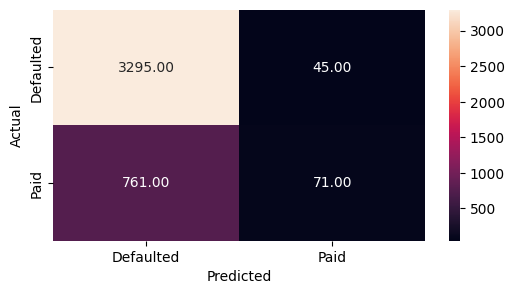

In [90]:
y_pred_train_lr = lg.predict(x_train_scaled)

metrics_score(y_train, y_pred_train_lr)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1431
           1       0.67      0.09      0.15       357

    accuracy                           0.81      1788
   macro avg       0.74      0.54      0.52      1788
weighted avg       0.79      0.81      0.75      1788



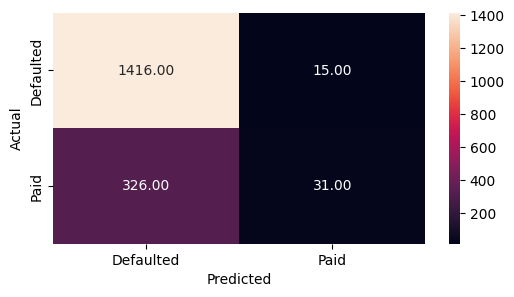

In [91]:
# Checking the performance on the test dataset
y_pred_test_lr = lg.predict(x_test_scaled)
metrics_score(y_test, y_pred_test_lr)

In [92]:
# Summary of model performance on test data
logreg_test = model_performance_classification(lg,x_test_scaled,y_test)
logreg_test

,Precision,Recall,Accuracy,F1 Score
1,0.67,0.09,0.81,0.15


- The F1 score for the logistic regression model is 0.15 which is very low and shows a low precision and recall score.

**Let's check the coefficients and find which variables are leading to defaulting and which can help to reduce defaulting.**

In [93]:
# Printing the coefficients of logistic regression
cols = x_train_scaled.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC,0.58
NINQ,0.39
REASON_HomeImp,0.15
JOB_Sales,0.11
JOB_Self,0.11
VALUE,0.08
CLNO,0.07
JOB_Other,0.02
DEROG,-0.00
DELINQ,-0.00


**OBSERVATIONS**

Features which positively affect on the defaulting rate are:
- DEBTINC
- NINQ
- REASON Home Imp

Features which positively affect on the defaulting rate are:
- CLAGE
- MORTDUE
- LOAN

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [94]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train_scaled.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

,odds
DEBTINC,1.78
NINQ,1.48
REASON_HomeImp,1.16
JOB_Sales,1.12
JOB_Self,1.11
VALUE,1.08
CLNO,1.07
JOB_Other,1.02
DEROG,1.00
DELINQ,1.00


**OBSERVATIONS**

- The odds of an applicant with DEBTINC ratio defaulting are 1.78 times (78% higher) the odds of one whose ratio is lower, probably because he will have more flexibility to pay his loan.

- The odds of an applicant with NINQ number defaulting are 1.48 times (48% higher) the odds of the one whose number is lower.

- The odds of an applicant with REASON_HomeImp defaulting are 1.16 times (16% higher)the odds of the one whose number is lower.

**The Precision-Recall Curve for Logistic Regression**

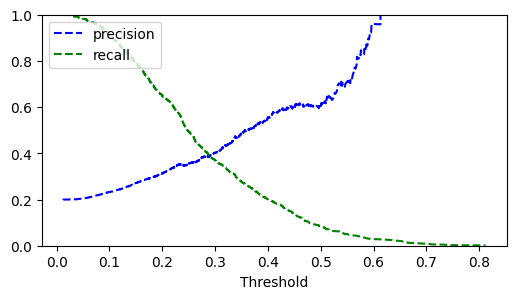

In [95]:
y_scores_lg = lg.predict_proba(x_train_scaled) # predict_proba gives the probability of each observation belonging to each class

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (6, 3))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**OBSERVATIONS**

- We can see that the precision and the recall are balanced for a threshold of about 0.29 (since we are focussing on a F1-score performance metric).

**Let's find out the performance of the model at this threshold.**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3340
           1       0.39      0.39      0.39       832

    accuracy                           0.76      4172
   macro avg       0.62      0.62      0.62      4172
weighted avg       0.76      0.76      0.76      4172



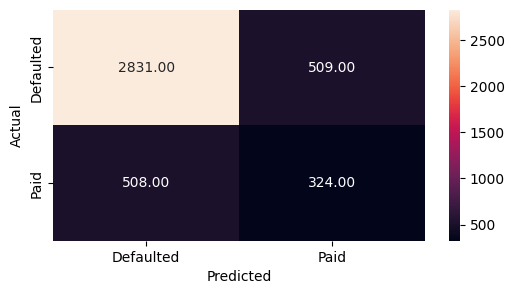

In [96]:
optimal_threshold1 = .29

y_pred_train_lr_th = lg.predict_proba(x_train_scaled)

metrics_score(y_train, y_pred_train_lr_th[:, 1] > optimal_threshold1)

- The model performance has improved to 0.39. The F1 score has increased significantly for class 1.

Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1431
           1       0.40      0.40      0.40       357

    accuracy                           0.76      1788
   macro avg       0.62      0.62      0.62      1788
weighted avg       0.76      0.76      0.76      1788



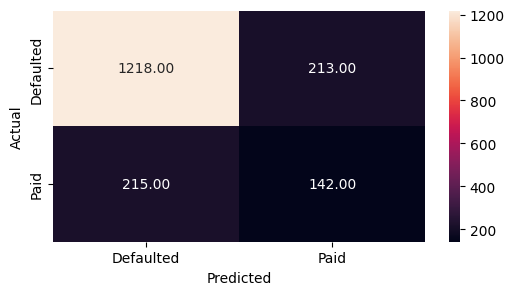

In [97]:
optimal_threshold1 = .29

y_pred_test_lr_th = lg.predict_proba(x_test_scaled)

metrics_score(y_test, y_pred_test_lr_th[:, 1] > optimal_threshold1)

**OBSERVATIONS**

- The model is giving a similar performance on the test (0.39) and the train datasets(0.40. The model is giving a generalized performance.

Let's see if we can get even better performance using other algorithms.

### Decision Tree

**What is a Decision Tree?**

Decision Trees are a type of supervised machine learning algorithm that can be used for both classification and regression tasks. They are often used in business and industry to make decisions based on data, and are particularly useful for tasks that require decision-making based on a set of conditions.

**How does a Decision Tree work?**

A Decision Tree works by recursively splitting the dataset into smaller subsets based on the feature that provides the most information gain at each step. This process continues until the subsets are as pure as possible, meaning that they contain as few mixed class labels as possible, or until a stopping criterion is met (e.g., when a maximum depth is reached).

The goal of the algorithm is to find the tree that provides the best predictions on the training data, while also being as simple and interpretable as possible.

**Building Decision Tree**

- We will build our model using the **DecisionTreeClassifier function**.
- If the frequency of class 0 is 80% and the frequency of class 1 is 20%, then class 0 will become the dominant class and the decision tree will become biased toward the frequency class.
- **class_weight** is a hyperparameter for the decision tree classifier, and in this case, we can pass a dictionary {0:0.20, 1:0.80} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [98]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [99]:
# Fitting decision tree model
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

**Checking the model performance of decision tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



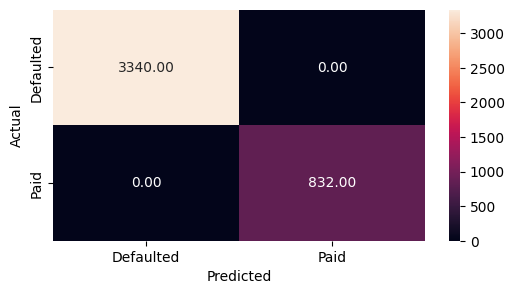

In [100]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train_scaled)

metrics_score(y_train, y_train_pred_dt)

**OBSERVATIONS**

- The Decision tree is giving a 100% score for all metrics on the training dataset. The model has performed very well on the training set.
- As we know, a decision tree will continue to grow and classify each data point correctly if no restrictions are applied, as the trees will learn all the patterns in the training set. So, it can easily overfit the training data.

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1431
           1       0.70      0.28      0.40       357

    accuracy                           0.83      1788
   macro avg       0.77      0.62      0.65      1788
weighted avg       0.81      0.83      0.80      1788



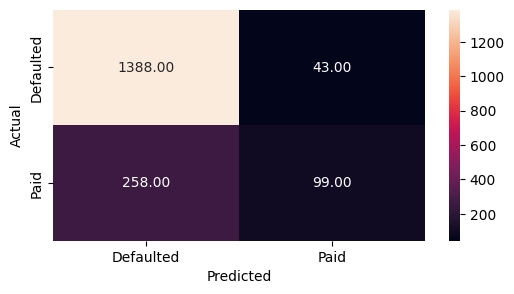

In [101]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test_scaled)

metrics_score(y_test, y_test_pred_dt)

In [102]:
# Summary of model performance on test data
dtree_test = model_performance_classification(dt, x_test_scaled, y_test)
dtree_test

,Precision,Recall,Accuracy,F1 Score
1,0.70,0.28,0.83,0.40


**OBSERVATIONS**

- The Decision Tree works well on the training data but not so well on the test data as the F1 score is 0.40 in comparison to 1 for the training dataset.
- The decision tree model is overfitting the training data as expected and is not able to generalize well on the test set.

Let's try hyperparameter tuning using **GridSearchCV** to find the optimal max_depth to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

Tuning the hyperparameters of a machine learning model can help improve its performance. Here are some steps you can follow to tune the hyperparameters of your model:

**- Identify the hyperparameters:** Before tuning the hyperparameters, it's important to identify the hyperparameters that can be tuned. In the case of the models you have built (Decision Trees, Random Forest,  XGBoost...), some of the hyperparameters that can be tuned include the number of estimators, learning rate, maximum depth, minimum sample split, etc.

**- Determine the range of values for each hyperparameter:** Once you have identified the hyperparameters, you need to determine the range of values that each hyperparameter can take. For example, you can set the range for the number of estimators to be between 50 and 200.

**- Choose a method to search for the best hyperparameters:** There are different methods for searching for the best hyperparameters, such as grid search and randomized search. Grid search is a simple and exhaustive method that involves evaluating the model performance for all possible combinations of hyperparameters within the specified range. Randomized search is similar to grid search, but instead of evaluating all possible combinations, it evaluates a random subset of combinations.

**- Train and evaluate the model with each combination of hyperparameters:** Once you have chosen a method to search for the best hyperparameters, you need to train and evaluate the model with each combination of hyperparameters within the specified range.

**- Select the hyperparameters that give the best performance:** Finally, you need to select the hyperparameters that give the best performance on the validation set. You can then use these hyperparameters to train the model on the full training set and evaluate its performance on the test set.

Overall, tuning the hyperparameters of a model can be a time-consuming process, but it can greatly improve the performance of the model.

**Parameters :**   
* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model.


In [103]:
# Choose the type of classifier
dt_estimator = DecisionTreeClassifier(class_weight = {0:0.20, 1:0.80}, random_state = 1)

# Grid of parameters to choose from
parameters = {'criterion': ['gini', 'entropy'],
              'max_features': [3, 7, 9],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dt_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train_scaled, y_train)

# Set the classifier to the best combination of parameters
dt_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dt_estimator.fit(x_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_features=9,
                       min_samples_split=25, random_state=1)

We have tuned the model and fit the tuned model on the training data.
Now let´s check model performance on the training and testing data.

**Checking performance of the model on the training data**

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3340
           1       0.65      0.96      0.77       832

    accuracy                           0.89      4172
   macro avg       0.82      0.91      0.85      4172
weighted avg       0.92      0.89      0.89      4172



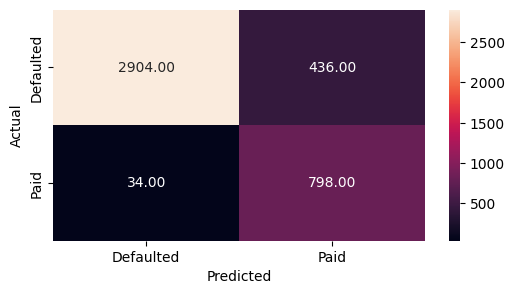

In [104]:
# Checking performance on the training dataset
y_pred_train_dt_tuned = dt_estimator.predict(x_train_scaled)

metrics_score(y_train, y_pred_train_dt_tuned)

**OBSERVATIONS**

- In comparison to the model with default values of hyperparameters, the performance on the training set has gone down significantly.
- We can see that the performance on the training data has decreased which can be expected as we are trying not to overfit the training dataset.


**Checking performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1431
           1       0.47      0.42      0.44       357

    accuracy                           0.79      1788
   macro avg       0.67      0.65      0.66      1788
weighted avg       0.78      0.79      0.79      1788



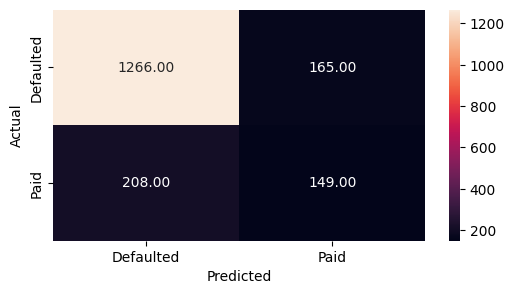

In [105]:
# Checking performance on the test dataset
y_test_pred_dt_tuned = dt_estimator.predict(x_test_scaled)

metrics_score(y_test, y_test_pred_dt_tuned)

In [106]:
# Summary of model performance on test data
dtree_tuned_test = model_performance_classification(dt_estimator, x_test_scaled, y_test)
dtree_tuned_test

,Precision,Recall,Accuracy,F1 Score
1,0.47,0.42,0.79,0.44


**OBSERVATIONS**

- We can observe that the F1 score for class 1 has decreased from 0.77 to 0.44.
- This model is not overfitting the training data and giving bad result on the test data.
- The tuned model is performing worst in comparison to the decision tree model with default values of hyperparameters.

**Decision Tree Visualization**

Let's visualize the decision tree and examine the tree's decision rules. Visualizing a Decision Tree can help you understand how the algorithm works and interpret its predictions. Visualizing the tree can help us to:

**- Identify the root node:** The first node at the top of the tree is called the root node. It represents the entire dataset and is used to split the data into two or more homogeneous subsets.

**- Identify the internal nodes:** The nodes that are not leaf nodes are called internal nodes. They represent a decision or a test on a feature and are used to split the data into smaller subsets based on the feature value.

**- Identify the leaf nodes:** The nodes at the bottom of the tree are called leaf nodes. They represent the output or the class label of the data after going through all the splits in the tree.

**- Follow a path from the root to a leaf node:** To interpret a decision tree, you can follow a path from the root node to a leaf node. Along the path, you can see the tests performed on the features, and based on the test results, the data is split into smaller subsets.

**- Analyze the feature importance:** You can analyze the feature importance by looking at the splits in the tree. The features used to split the data at the top of the tree are the most important features, as they have the highest impact on the decision.

**- Analyze the class distribution:** You can analyze the class distribution at the leaf nodes to understand how the decision tree predicts the class labels. If the majority of the samples in a leaf node belong to a particular class, the decision tree predicts that class for the new data.

**- Explain the decision:** Finally, you can explain the decision made by the decision tree by summarizing the path taken from the root to the leaf node and the class label predicted at the leaf node. You can also explain the importance of the features used in the decision and how they influence the final prediction.

**It is hard to visualize and interpret the tree with depth = 9, We can reduce the depth to 4 and visualize it**

In [123]:
tree_model = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, min_samples_leaf=25, max_depth = 4, random_state=1)

In [124]:
# Fit the best algorithm to the data Tuned Decision Tree
tree_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=4,
                       min_samples_leaf=25, random_state=1)

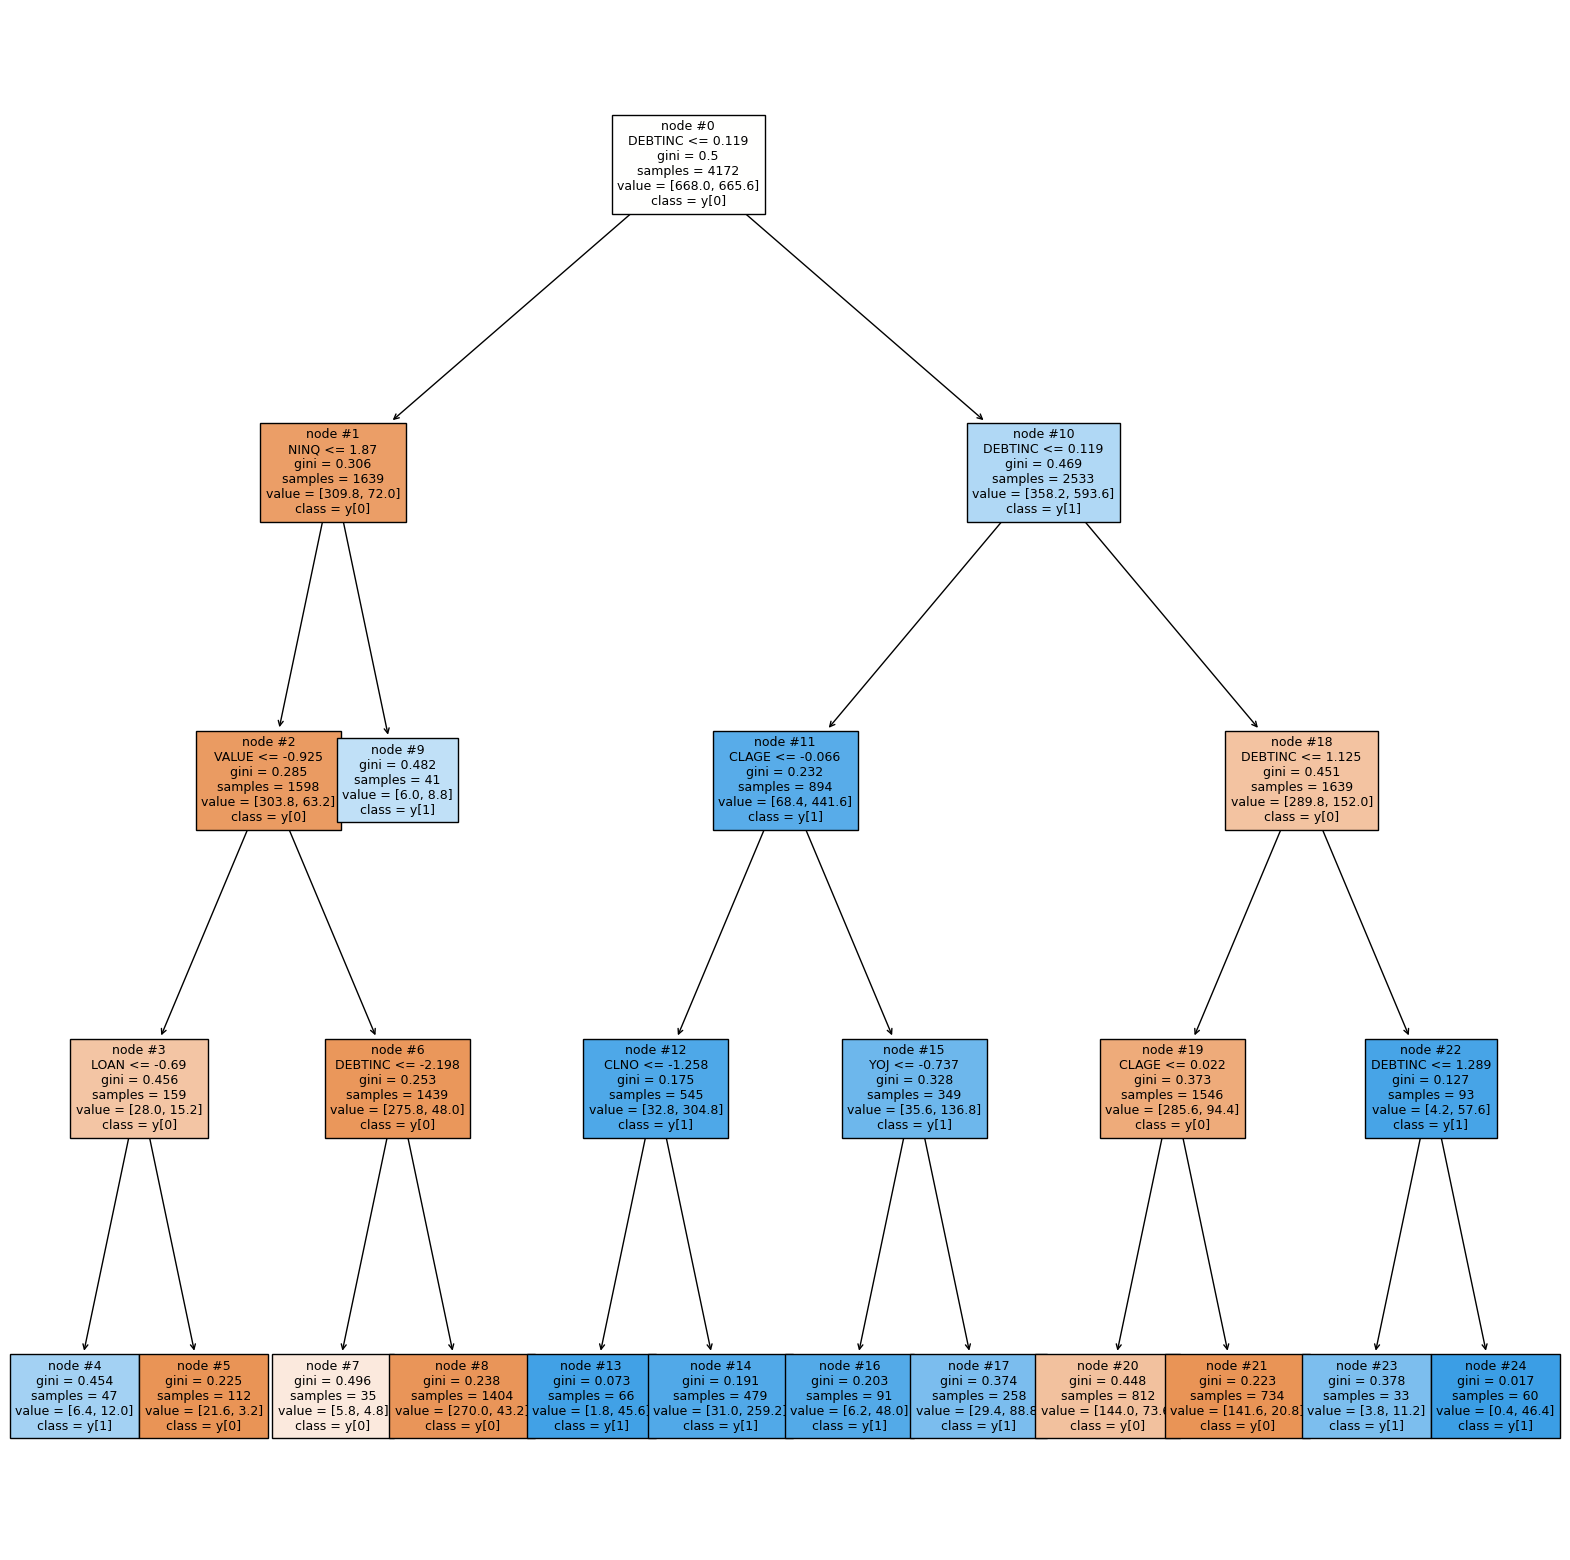

In [127]:
# Plot the Tuned Decision Tree
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [ ]:
# See a printed representation of the Decision Tree
print(tree.export_text(tree_model, feature_names=x_train.columns.tolist(), show_weights=True))

|--- DEBTINC <= 0.12
|   |--- NINQ <= 1.87
|   |   |--- VALUE <= -0.93
|   |   |   |--- LOAN <= -0.69
|   |   |   |   |--- weights: [6.40, 12.00] class: 1
|   |   |   |--- LOAN >  -0.69
|   |   |   |   |--- weights: [21.60, 3.20] class: 0
|   |   |--- VALUE >  -0.93
|   |   |   |--- DEBTINC <= -2.20
|   |   |   |   |--- weights: [5.80, 4.80] class: 0
|   |   |   |--- DEBTINC >  -2.20
|   |   |   |   |--- weights: [270.00, 43.20] class: 0
|   |--- NINQ >  1.87
|   |   |--- weights: [6.00, 8.80] class: 1
|--- DEBTINC >  0.12
|   |--- DEBTINC <= 0.12
|   |   |--- CLAGE <= -0.07
|   |   |   |--- CLNO <= -1.26
|   |   |   |   |--- weights: [1.80, 45.60] class: 1
|   |   |   |--- CLNO >  -1.26
|   |   |   |   |--- weights: [31.00, 259.20] class: 1
|   |   |--- CLAGE >  -0.07
|   |   |   |--- YOJ <= -0.74
|   |   |   |   |--- weights: [6.20, 48.00] class: 1
|   |   |   |--- YOJ >  -0.74
|   |   |   |   |--- weights: [29.40, 88.80] class: 1
|   |--- DEBTINC >  0.12
|   |   |--- DEBTINC <= 1.12

Note: Blue leaves represent the applicants that will default on loan, i.e., y[1], while the light orange leaves represent applicants that will pay the loan, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets.

**OBSERVATIONS ON DECISION TREE**

**Root Node**: first_interaction_Website <= -0.5. This is the starting point of the decision tree, which means that the first interacting through website results in the highest information gain among all the features. If the value is less than or equal to 0.5, the left branch is taken, and if it is greater than 0.5, the right branch is taken.

**Internal Node**: These are the intermediate nodes of the tree. Each node represents a decision based on a particular feature and a threshold value. Depending on the value of the feature, the tree follows the appropriate branch until it reaches a leaf node : time_spent_on_website, age, last_activity_Website, profile_completed_Medium.

**Leaf nodes** are the nodes in the tree that do not have any child nodes. In this tree, the leaf nodes correspond to the final decision of the tree.

Interpretation of the Decision Tree :

- The first split in the decision tree is at DEBTINC which implies that it is one of the most important factors in deciding whether the applicant will default or not.
- If we follow the tree, the applicant that does not have a high DEBTINC, whose NINQ is lower and whose LOAN is lower is more likely to pay his loan.
- On the other end, the applicant that has a higher DEBTINC with CLAGE is more likely to default on paying the loan.

**FEATURE IMPORTANCE**

Let's look at the feature importance of this model and try to analyze why this is happening.

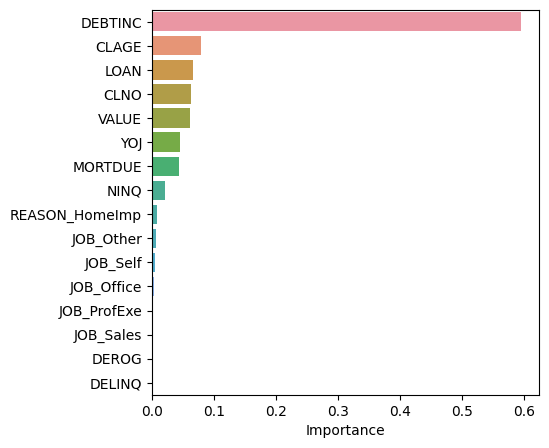

In [ ]:
# Feature importance of the Decision Tree visualization
importances = dt_estimator.feature_importances_

columns = x_train_scaled.columns

importance_data = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (5, 5))

sns.barplot(x=importance_data.Importance, y=importance_data.index);

**OBSERVATIONS**

After tuning the model we are getting that only 1 feature has a very high importance: DEBTINC to decide whether an applicant will default or not. The following important features would be CLAGE, LOAN, CLNO and VALUE.

Let´s build another model : Random Forest model

### **Building a Random Forest Classifier**

**What is a Random Forest?**

Random Forest is another ensemble learning technique that combines multiple Decision Trees to create a more robust and accurate model. Like Bagging, it involves training multiple models on different subsets of the training data, but with an additional twist: at each split in the tree, only a random subset of the available features is considered for splitting and on each sample a decision tree makes a prediction.

This helps to reduce the correlation between the trees in the forest and improves their overall accuracy.

**How does a Random Forest work?**

A Random Forest works by training multiple Decision Trees on different subsets of the training data, and then combining their predictions by taking their average. The key difference from Bagging is that at each split in the tree, only a random subset of the features is considered for splitting.

The algorithm works as follows:

- Generate multiple random subsets of the training data (with replacement).
- For each subset, train a Decision Tree on a random subset of the features.
- Make predictions for new data; results from all the decision trees are combined together and the final prediction is made using voting for classification problems

The number of trees in the forest and the number of features considered at each split are hyperparameters that can be tuned to optimize the performance of the model.


In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.20, 1: 0.80}, random_state = 7, criterion = "entropy")

rf_estimator.fit(x_train_scaled,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       random_state=7)

**Checking performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



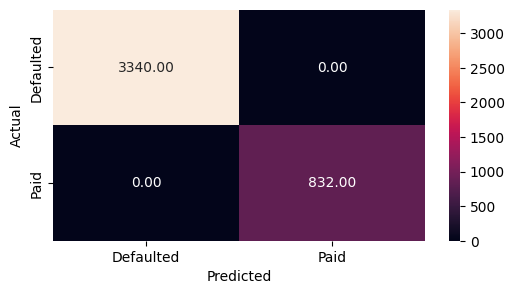

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train_scaled)

metrics_score(y_train, y_pred_train_rf)

**OBSERVATIONS**

- Similar to the decision tree, the random forest model is giving a perfect performance on the training data.
- The model is most likely overfitting to the training dataset as we observed for the decision tree.

**Checking performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1431
           1       0.95      0.25      0.40       357

    accuracy                           0.85      1788
   macro avg       0.90      0.63      0.66      1788
weighted avg       0.86      0.85      0.81      1788



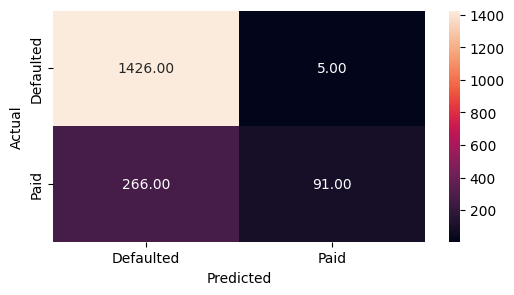

In [ ]:
y_pred_test_rf = rf_estimator.predict(x_test_scaled)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
# Summary of model performance on test data
rf_estimator_test = model_performance_classification(rf_estimator,x_test_scaled,y_test)
rf_estimator_test

,Precision,Recall,Accuracy,F1 Score
1,0.95,0.25,0.85,0.40


**OBSERVATIONS**

- The Random Forest classifier seems to be overfitting the training data. The F1 score on the training data is 1, while the F1 score on the test data is only 0.40 for class 1.

Let's try hyperparameter tuning using **GridSearchCV** to find the optimal max_depth to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Random Forest Classifier Hyperparameter Tuning**

Tuning the hyperparameters of a machine learning model can help improve its performance.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 7, criterion = "entropy")

In [ ]:
# Grid of parameters to choose from
parameters = {"n_estimators": [90, 110, 130],
              "max_depth": [15, 20, 25],
              "min_samples_leaf" : np.arange(1, 10, 1),
              "max_features": [0.8, 1, 1.3],
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train_scaled, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [ ]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(x_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=25, max_features=1, min_samples_leaf=3,
                       n_estimators=130, random_state=7)

**Checking performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3340
           1       0.95      0.99      0.97       832

    accuracy                           0.99      4172
   macro avg       0.97      0.99      0.98      4172
weighted avg       0.99      0.99      0.99      4172



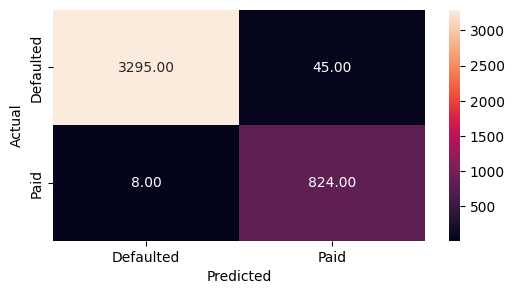

In [ ]:
y_pred_train_rf_tuned = rf_estimator_tuned_base.predict(x_train_scaled)

metrics_score(y_train, y_pred_train_rf_tuned)

**OBSERVATIONS**

- The tuned random forest model is giving a good performance on the training data.
- The model is most likely overfitting to the training dataset.

**Checking performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1431
           1       0.92      0.51      0.66       357

    accuracy                           0.89      1788
   macro avg       0.91      0.75      0.80      1788
weighted avg       0.90      0.89      0.88      1788



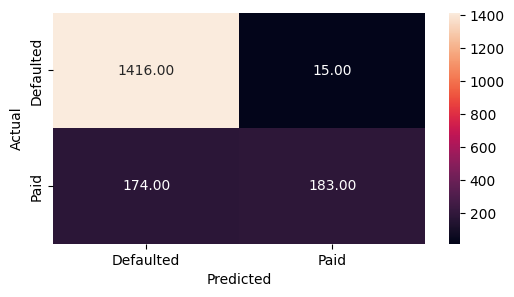

In [ ]:
# Checking performance on the testing data
y_pred_test_rf_tuned = rf_estimator_tuned_base.predict(x_test_scaled)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
# Summary of model performance on test data
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned_base, x_test_scaled, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy,F1 Score
1,0.92,0.51,0.89,0.66


**OBSERVATIONS**

- The F1 score for this Random Forest Tuned model is performing better on the training 0.97 rather than the testing 0.66.
- This is our best performing model so far.

**Visualizing the feature importance of the tuned random forest model**

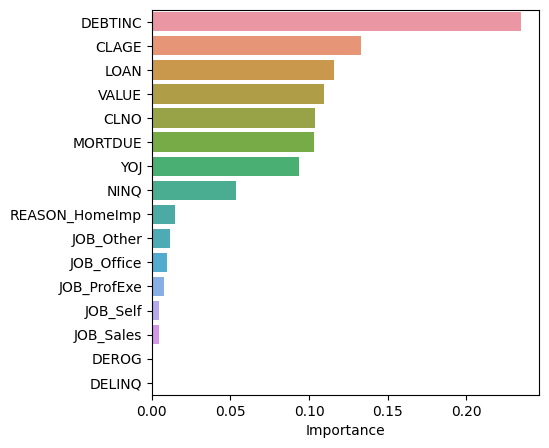

In [ ]:
# Visualize feature importance of the tuned random forest model
importances = rf_estimator_tuned_base.feature_importances_

columns = x_train_scaled.columns

importance_data = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (5, 5))

sns.barplot(x=importance_data.Importance, y=importance_data.index);

OBSERVATIONS

- The feature importance plot for the Tuned Random Forest model shows more features to take into account when an applicant is likely to default the loan. The main feature is still by far DEBTINC, then comes CLAGE, LOAN, VALUE, MORTDUE, CLNO, YOJ and NINQ to take into account.

We will try a last Boosting Method : XGBoost

**ADDITIONAL METHOD XGBOOST**

In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1)

# Fitting the model
xgb.fit(x_train_scaled,y_train)

# Summary of model performance on test data
xgb_perf_test = model_performance_classification(xgb, x_test_scaled, y_test)

xgb_perf_test

,Precision,Recall,Accuracy,F1 Score
1,0.95,0.33,0.86,0.49


**OBSERVATIONS**

-  The XGBoost model doesn´t improve the performance metrics compared to the other models.

**MODEL BUILDING SUMMARY**

We have now gone through our different algorythm process.
Let´s review the performance for each model we have implemented.

In [ ]:
# Summary of the implemented model on test data
models_test_comp_data = pd.concat(

    [
    logreg_test.T, dtree_test.T, dtree_tuned_test.T, rf_estimator_test.T, rf_estimator_tuned_test.T, xgb_perf_test.T
    ],

    axis = 1,
)

models_test_comp_data.columns = [
    'Logistic Regression',
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "XGBoost classifier"
]

In [ ]:
print("Test performance comparison:")
models_test_comp_data

Test performance comparison:


,Logistic Regression,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,XGBoost classifier
Precision,0.67,0.70,0.47,0.95,0.92,0.95
Recall,0.09,0.28,0.42,0.25,0.51,0.33
Accuracy,0.81,0.83,0.79,0.85,0.89,0.86
F1 Score,0.15,0.40,0.44,0.40,0.66,0.49


**OBSERVATIONS**

- The Tuned Random Forest model gives the best results of all model creation.

## Actionable Insights and Recommendations

**CONCLUSIONS AND RECOMMENDATIONS**

* We have been able to build several predictive models with linear logistic regression, non-linear tree-based and boosting models that can be used by the bank FairlyBank to predict which applicants are likely to default the loan and to take into account the important feature that would lead to defaulting.

* It´s important to remember that we have decided with FairlyBank that we want to do a delicate balancing act between risk management and revenue generation since both errors are important for us to minimize.
The bank would want the F1 Score evaluation metric to be maximize. Hence, the focus should be on increasing the F1 score rather than focusing on just one metric (Recall or Precision).

* **The Tuned Random Forest model** is giving the highest F1 score of 66% and the macro average of 80% on the test data. Unfortunately, the model needs some slightly performance improvements before deployment in production. We will need to continue working on models to reach a higher F1 score with balanced precision and recall scores so the FairlyBank will be able to predict better which applicants will default or not on his loan payment. With this FairlyBank will be able to maintain a balance between resources and brand equity as well as compliance considerations and regulations oversight related to fair lending practices (ex: Equal Credit Opportunity Act (ECOA)).

* **Model interpretation:** Eventhough Tuned Random Forest model is less interpretable compared to the Decision Tree that would have been a great tool to provide a justification for any adverse behavior, the Tuned Random Forest model can still give us very good insight.

**We can still draw very good conclusions and recommendations from the analysis and implemented models :**


* **Key role to improve Loan Payment:**

FairlyBank would first look into applications focussing on DEBTINC (debt-to-income ratio) which is by far the main meaningful insight to consider when an applicant will default or not. This is the value that bank executives should consider first.

Then, for a streamlining and more accurate loan application processing, they should consider the applicant´s age of the oldest credit line in months (CLAGE), amount of loan approved (LOAN), current value of property (VALUE), amount due on the existing mortgage (MORTDUE), number of existing credit lines (CLNO),  years at present job (YOJ) and number of recent credit inquiries (NINQ) to take into account.


* We have seen that some of these important variables : VALUE, MORTDUE and LOAN **are correlated**.

It reasonable to assume that not many loan applicants will have already paid off their mortgage and that if your property is worth more than the average property you would also have an above average outstanding mortgage amount (VALUE and MORTDUE).It is a fundamental aspect of secured lending : the value of an asset is used as collateral to secure the loan, mitigate risk, and determine loan amounts and interest rates. This relationship is important for both borrowers and lenders in secured lending transactions (VALUE and LOAN).











NEXT STEPS RECOMMENDATIONS TO IMPROVE PERFORMANCES FURTHER

* **High-quality data collection:**
We know that collecting and preparing high-quality data can be expensive and time-consuming. Gather high-quality data from various sources, including customer information, credit history, financial records, and other relevant data points. Ensure data is clean, complete, and free from errors or inconsistencies. Focus on improving :

-- Divide into subsegment the "other job" category

-- Collect missing values on strong pattern as wherever the CLNO column has missing data the other columns like DEROG, DELINQ, CLAGE and NINQ also have missing values.

This would give us a scope to improve the performance of our prediction model further.

* **Customer Communication:** Develop clear and transparent communication channels for customers to understand the reasons behind loan approval or denial (model interpretability).

* **Education and training:** Train bank personnel, including loan officers, on how to use and interpret the model's results, ensuring proper alignment with their decision-making processes.

* **Ethical considerations:** Promote ethical data usage by adhering to principles such as fairness, transparency, accountability, and inclusivity and follow regulations and compliance to accept loan approval.

* **Risk management:** Develop strategies for managing loan portfolio risk, considering the model's predictions and uncertainties.

* **Feedback loop:** Establish a feedback loop to collect and incorporate new data, improving model accuracy and robustness over time.

* **Scalability:** Design the system to be scalable, as loan prediction models may need to handle a high volume of loan applications.

With these insights and recommendations, we are confident that FairlyBank will take more efficient data-driven decisions, reducing subjectivity and bias in loan approval. They will have faster and more accurate loan application processing, reducing the time taken to approve or deny loan requests taking into account actual regulations.

**EXPECTED BENEFITS AND COST**

These are some of the benefits and costs for FairlyBank to take into account while implementing this model solution:


* **Improved Loan Approval Process:**
Faster and more accurate loan application process with reduction in the time taken to approve or deny loan requests. Reduce wrong judgment/approval owing to human error and biases.

* **Reduced Risk of Default:**
Better prediction of creditworthiness can lead to a decrease in the number of loans granted to high-risk applicants, reducing the bank's exposure to loan default.

* **Increased Efficiency:**
Streamlining the loan approval process can lead to cost savings and operational efficiency improvements.

* **Enhanced Customer Experience:**
A faster and more automated loan approval process can provide a better experience for customers, leading to higher rewarding customer satisfaction and loyalty.

* **Data-Driven Decision-Making:**
FairlyBank can make more informed, interpretable and data-driven decisions, reducing subjectivity from its personal and bias in loan approval.

* **Reduced Compliance Risk:**
By automating decision-making processes, FairlyBank can better adhere to regulatory requirements and minimize compliance risks (ECOA and actual regulations).

* **Increased Profitability:**
More accurate loan approvals can lead to an increase in profitable loan portfolios.

* **Model improvement:**
With the given recommendations, the model can be improved to reach better performance results that will also increase the risk to FairlyBank.

On the other hand, the model implementation will drive some additional costs:

* **Data Collection and Preparation Costs:**
Collecting and preparing high-quality data can be expensive and time-consuming.

* **Model Development and Maintenance Costs:**
Developing and training models requires resources (internal or external), including data scientists and computational infrastructure. Regular model monitoring, retraining, and updates require ongoing resources.

* **Regulatory and Compliance Costs:**
Ensuring that the model complies with regulatory and legal requirements may involve legal and compliance expertise.

* **Employee Training Costs:**
Training loan officers and bank staff to work with the new system may require resources and time.

* **Infrastructure Costs:**
Investment in computing infrastructure and storage to handle the data and model deployment.

* **Ethical and Fairness Audits:**
Implementing ethical and fairness checks and audits can incur additional costs.

* **Testing and Validation Costs:**
Rigorous testing and validation of the model's performance metrics and fairness are essential and may involve additional expenses.

* **Security Costs:**
Implementing strong security measures to protect customer data and the model can be costly.

* **Operational Costs:**
Ongoing operational costs may include server maintenance, software licenses, and technical support.

Today, we are unable to present an detailed amount for this  cost-benefit analysis to determine the overall financial impact of implementing a loan prediction solution eventhough from industry implemented techniques, we know that the benefits are expected to outweigh the costs over time.

>The implementation and improved adecuacy of this model should result in long-term savings and revenue growth for FarilyBank.

